# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - Md Saif Ansari**

# **Project Summary -**

**Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.**

**Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.**

**Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.**

**Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Our client, an insurance company, aims to enhance its revenue and optimize its business model by effectively targeting potential customers for vehicle insurance. The company seeks to leverage predictive modeling techniques to identify customers from the previous year's policyholders who are likely to be interested in purchasing vehicle insurance. By analyzing demographic information, vehicle details, policy data, and other relevant factors, the objective is to develop a predictive model that accurately predicts customer interest in vehicle insurance. The successful implementation of this model will enable the company to tailor its communication strategies, optimize marketing efforts, and enhance customer engagement, ultimately leading to increased revenue and improved business performance.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

sns.set()

### Dataset Loading

In [2]:
# Load Dataset
DATA_FILE = "https://raw.githubusercontent.com/saifghostrider454/Almabetter-Classification_Project/main/TRAIN-HEALTH%20INSURANCE%20CROSS%20SELL%20PREDICTION.csv"


df = pd.read_csv(DATA_FILE)

### Dataset First View

In [3]:
# Dataset First Look

df.sample(3)

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
174486  174487  Female   24                1          8.0                   1   
308622  308623    Male   70                1         46.0                   1   
272768  272769    Male   23                1          7.0                   1   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
174486    < 1 Year             No         58874.0                 152.0   
308622    1-2 Year             No         35515.0                 124.0   
272768    < 1 Year             No          2630.0                 152.0   

        Vintage  Response  
174486      122         0  
308622      106         0  
272768      208         0

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"There are {df.shape[0]} Rows and {df.shape[1]} Columns")

There are 381109 Rows and 12 Columns


### Dataset Information

In [5]:
# Dataset Info
desc_df = pd.DataFrame(index=list(df))
desc_df['count'] = df.count()
desc_df['nunique'] = df.nunique()
desc_df['%unique'] = desc_df['nunique'] / len(df) * 100
desc_df['null'] = df.isnull().sum()
desc_df['type'] = df.dtypes
desc_df = desc_df.style.background_gradient(cmap='Greens')
desc_df

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

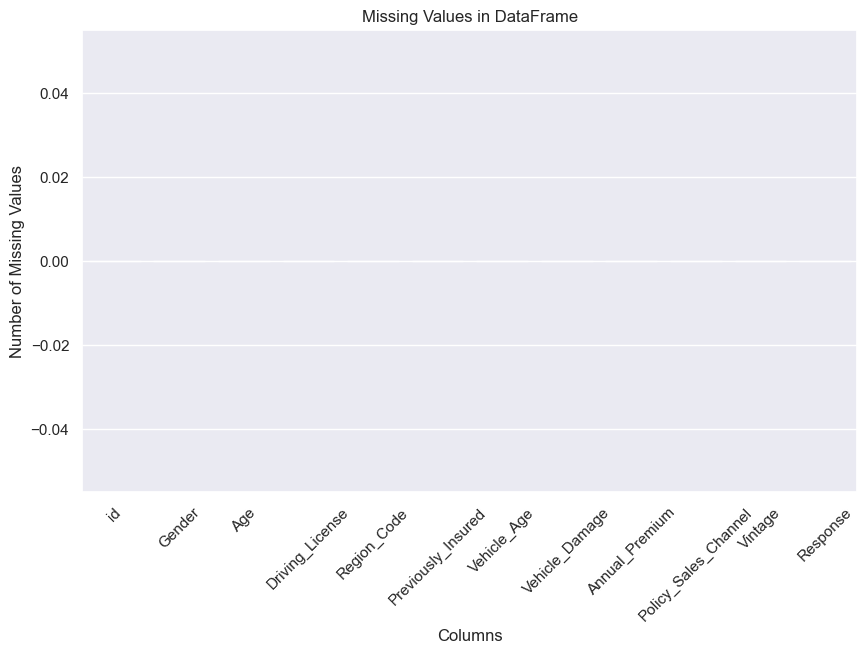

In [8]:
# Visualizing the missing values
missing_values = df.isnull().sum()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

### What did you know about your dataset?

**Well, There is no missing, Null or Duplicated Values. This Dataset is almost clear**

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
numerical_features = df._get_numeric_data().columns[[1, 3, 5, 6, 7]]
categorical_features = df.drop(numerical_features, axis=1).columns
numerical_features, categorical_features

(Index(['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
        'Vintage'],
       dtype='object'),
 Index(['id', 'Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
        'Vehicle_Damage', 'Response'],
       dtype='object'))

In [10]:
# Dataset Describe
df.describe().T \
.style.bar(subset=['mean'], color=px.colors.qualitative.G10[0]) \
.background_gradient(subset=['std'], cmap='Greens') \
.background_gradient(subset=['50%'], cmap='BuGn')

### Variables Description 

The provided data shows the summary statistics for several variables in a dataset. Let's break down each part:

Count: This column indicates the number of non-null values for each variable. In this dataset, there are 381,109 observations for each variable.

Mean: The mean represents the average value of the variable across all observations. For example:

The average age of the policyholders is approximately 38.82 years.
The average value of the annual premium paid by the policyholders is approximately 30,564.39 Rs.
Std (Standard Deviation): This column shows the standard deviation, which measures the dispersion or spread of the values around the mean. A higher standard deviation indicates greater variability in the data. For example:

The standard deviation for age is approximately 15.51 years, indicating some variability in the ages of policyholders.
The standard deviation for the annual premium is approximately 17,213.16 Rs, indicating significant variability in the premium amounts paid by policyholders.
Min: The minimum value observed for each variable in the dataset. For example:

The minimum age of the policyholders is 20 years.
The minimum annual premium paid by any policyholder is 2,630 Rs.
25% (First Quartile), 50% (Median or Second Quartile), 75% (Third Quartile): These columns represent the quartiles of the data distribution. The first quartile (25th percentile) is the value below which 25% of the observations fall, the second quartile (50th percentile or median) is the middle value of the dataset, and the third quartile (75th percentile) is the value below which 75% of the observations fall. For example:

For the age variable, the median age is 36 years, and 25% of the policyholders are younger than 25 years.
For the annual premium variable, 25% of the policyholders pay an annual premium of less than 24,405 Rs, and 75% pay less than 39,400 Rs.
Max: The maximum value observed for each variable in the dataset. For example:

The maximum age of the policyholders is 85 years.
The maximum annual premium paid by any policyholder is 540,165 Rs.
Variable Names: Each row corresponds to a variable in the dataset, such as 'id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', and 'Vintage'. These are the features or attributes of the dataset that describe the policyholders and their insurance policies.

Overall, these summary statistics provide valuable insights into the distribution, central tendency, and variability of each variable in the dataset, aiding in data analysis and interpretation.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

desc_df = pd.DataFrame(index=list(df))
desc_df['nunique'] = df.nunique()
desc_df['%unique'] = desc_df['nunique'] / len(df) * 100
desc_df = desc_df.style.background_gradient(cmap='Greens')
# desc_train = pd.concat([desc_train, train.describe().T], axis=1)
desc_df

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    It gives the names of categorical, numerical, and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
        cat_th: int, optional
                the class threshold for numeric but categorical variables
        car_th: int, optinal
                the class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical Variables List
        num_cols: list
                Numeric Variables List
        cat_but_car: list
                Categorical but cardinal variables list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is in cat_cols

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 381109
Variables: 12
cat_cols: 6
num_cols: 6
cat_but_car: 0
num_but_cat: 3


### Handling Numeric Features

#### Outliers

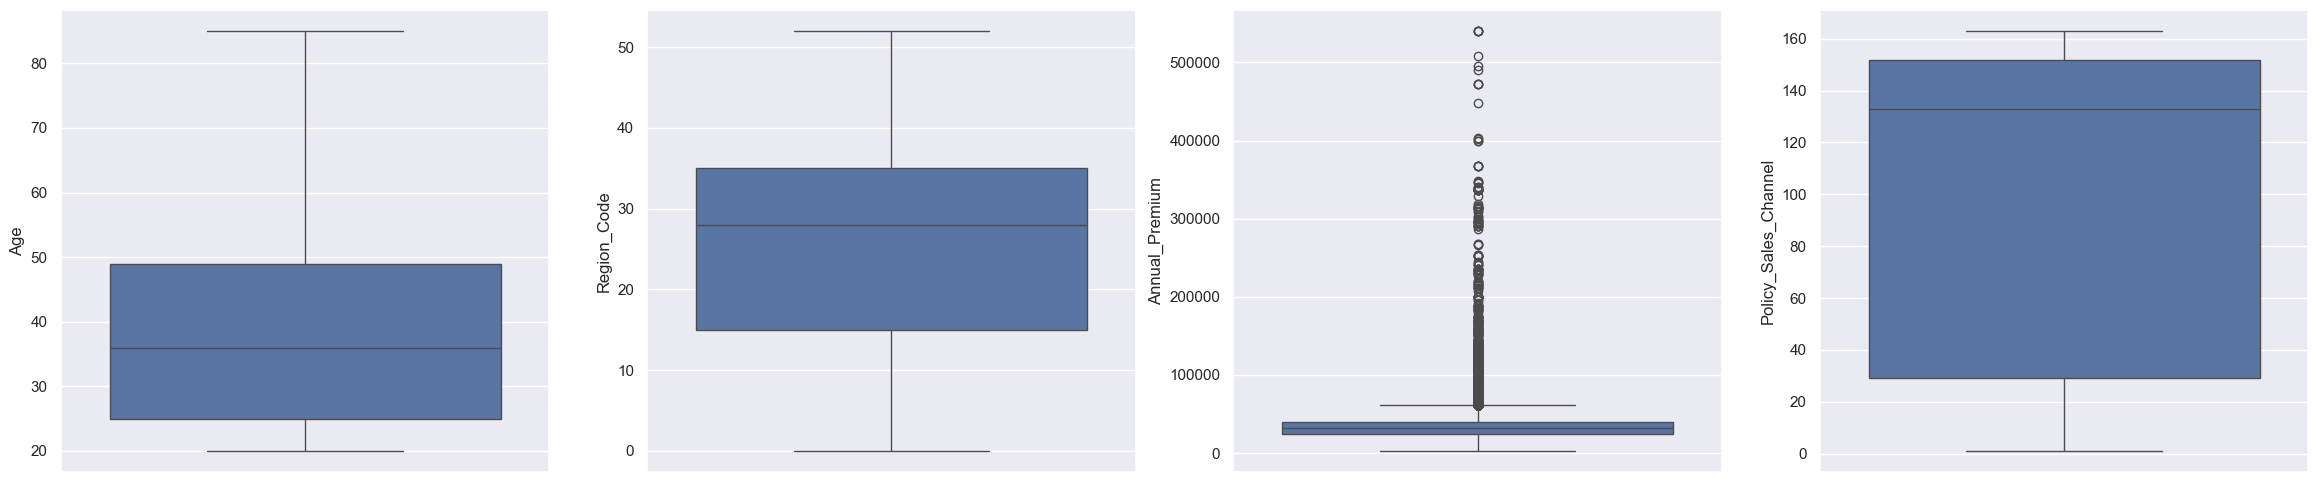

In [13]:
length = len(numerical_features[:-1])

fig, ax = plt.subplots(1, length, figsize=[29, 6])

for i in range(length):
    sns.boxplot(df[numerical_features[i]], ax=ax[i])


plt.show()

In [4]:
class HandlingOutliers:
    """
    A class to handle outliers in a DataFrame.
    
    Attributes:
        input_df (DataFrame): The input DataFrame.
        output_df (DataFrame): The modified DataFrame with outliers handled.
    """
    
    def __init__(self, input_df):
        """
        Initializes the HandlingOutliers object.
        
        Parameters:
            input_df (DataFrame): The input DataFrame.
        """
        self.output_df = input_df.copy()
        
    
    def fit(self, columns):
        """
        Fits the HandlingOutliers object to the data.
        
        Parameters:
            columns (list): A list of columns to be processed.
        
        Returns:
            HandlingOutliers: The fitted HandlingOutliers object.
        """
        return self
    
    def transform(self, columns):
        """
        Transforms the specified columns to handle outliers.
        
        Parameters:
            columns (list): A list of columns to be processed.
        
        Returns:
            DataFrame: The modified DataFrame with outliers handled.
        """
        for col in columns:
            Q1 = self.output_df[col].quantile(0.25)
            Q3 = self.output_df[col].quantile(0.75)
            
            IQR = Q3 - Q1
            
            maximum_threshold = Q3 + 1.5 * IQR
            minimum_threshold = Q1 - 1.5 * IQR
            
            self.output_df[col] = np.where(self.output_df[col] > maximum_threshold, maximum_threshold,
                                           np.where(self.output_df[col] < minimum_threshold, minimum_threshold,
                                                    self.output_df[col]))
        
        return self.output_df

In [202]:
class RemovingOutliers:
    """
    A class to remove outliers from specified columns in a DataFrame.
    
    Attributes:
        input_df (DataFrame): The input DataFrame.
        output_df (DataFrame): The modified DataFrame with outliers removed.
    """
    
    def __init__(self, input_df):
        """
        Initializes the RemovingOutliers object.
        
        Parameters:
            input_df (DataFrame): The input DataFrame.
        """
        self.output_df = input_df.copy()
        
    def fit(self, columns):
        """
        Fits the RemovingOutliers object to the data.
        
        Parameters:
            columns (list): A list of columns to be processed.
        
        Returns:
            RemovingOutliers: The fitted RemovingOutliers object.
        """
        return self
    
    def transform(self, columns):
        """
        Transforms the specified columns to remove outliers.
        
        Parameters:
            columns (list): A list of columns to be processed.
        
        Returns:
            DataFrame: The modified DataFrame with outliers removed.
        """
        for col in columns:
            Q1 = self.output_df[col].quantile(0.25)
            Q3 = self.output_df[col].quantile(0.75)
            
            IQR = Q3 - Q1
            
            maximum_threshold = Q3 + 1.5 * IQR
            minimum_threshold = Q1 - 1.5 * IQR
            
            # Remove outliers
            self.output_df = self.output_df[~((self.output_df[col] > maximum_threshold) | (self.output_df[col] < minimum_threshold))]
            
        return self.output_df

In [5]:
ho = HandlingOutliers(df)

df = ho.transform(numerical_features[:-1])

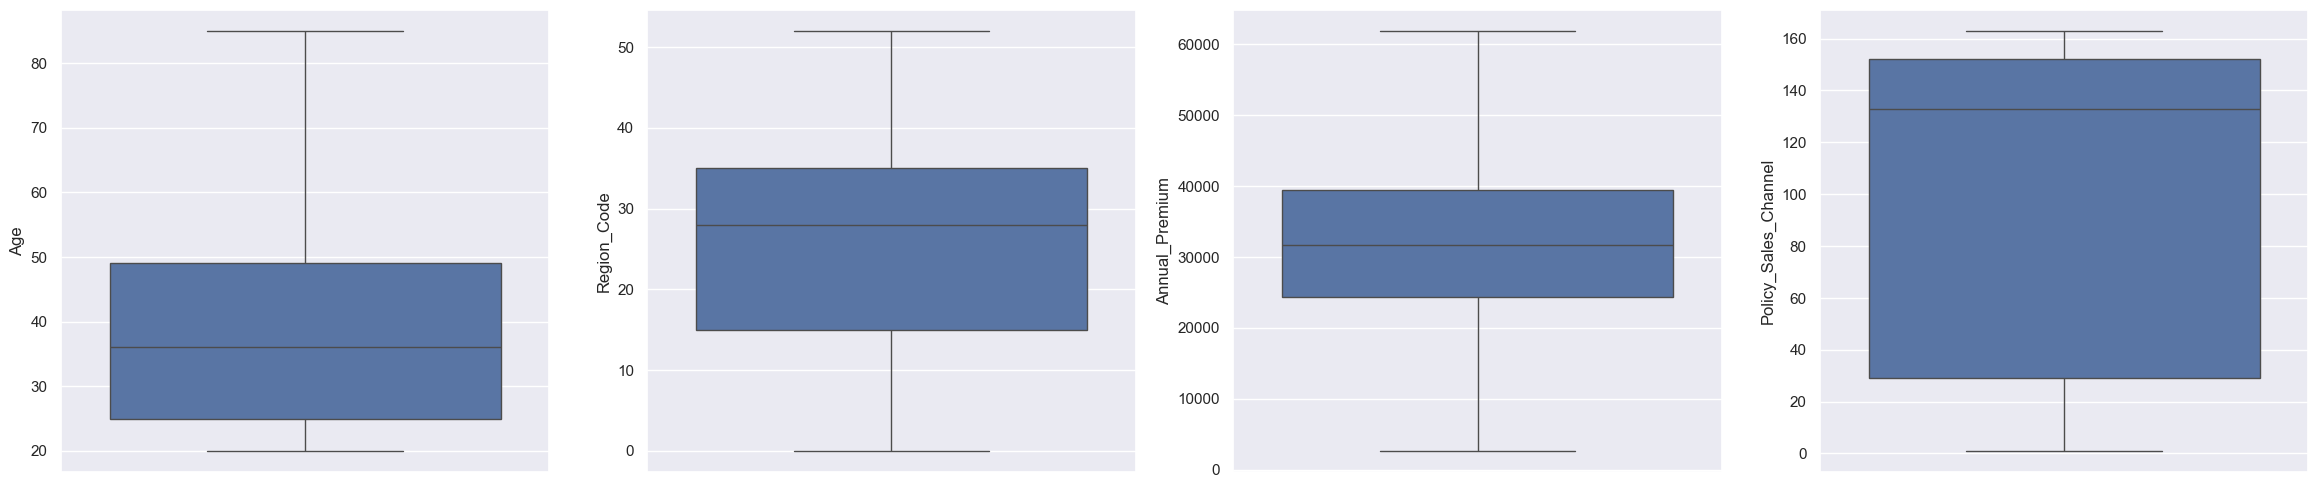

In [6]:
length = len(numerical_features[:-1])

fig, ax = plt.subplots(1, length, figsize=[29, 6])

for i in range(length):
    sns.boxplot(df[numerical_features[i]], ax=ax[i])


plt.show()

In [7]:
df.Region_Code = df.Region_Code.astype('int')

### What all manipulations have you done and insights you found?

**In Data Wrangling We Found Outliers So i Handled it using IQR method**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

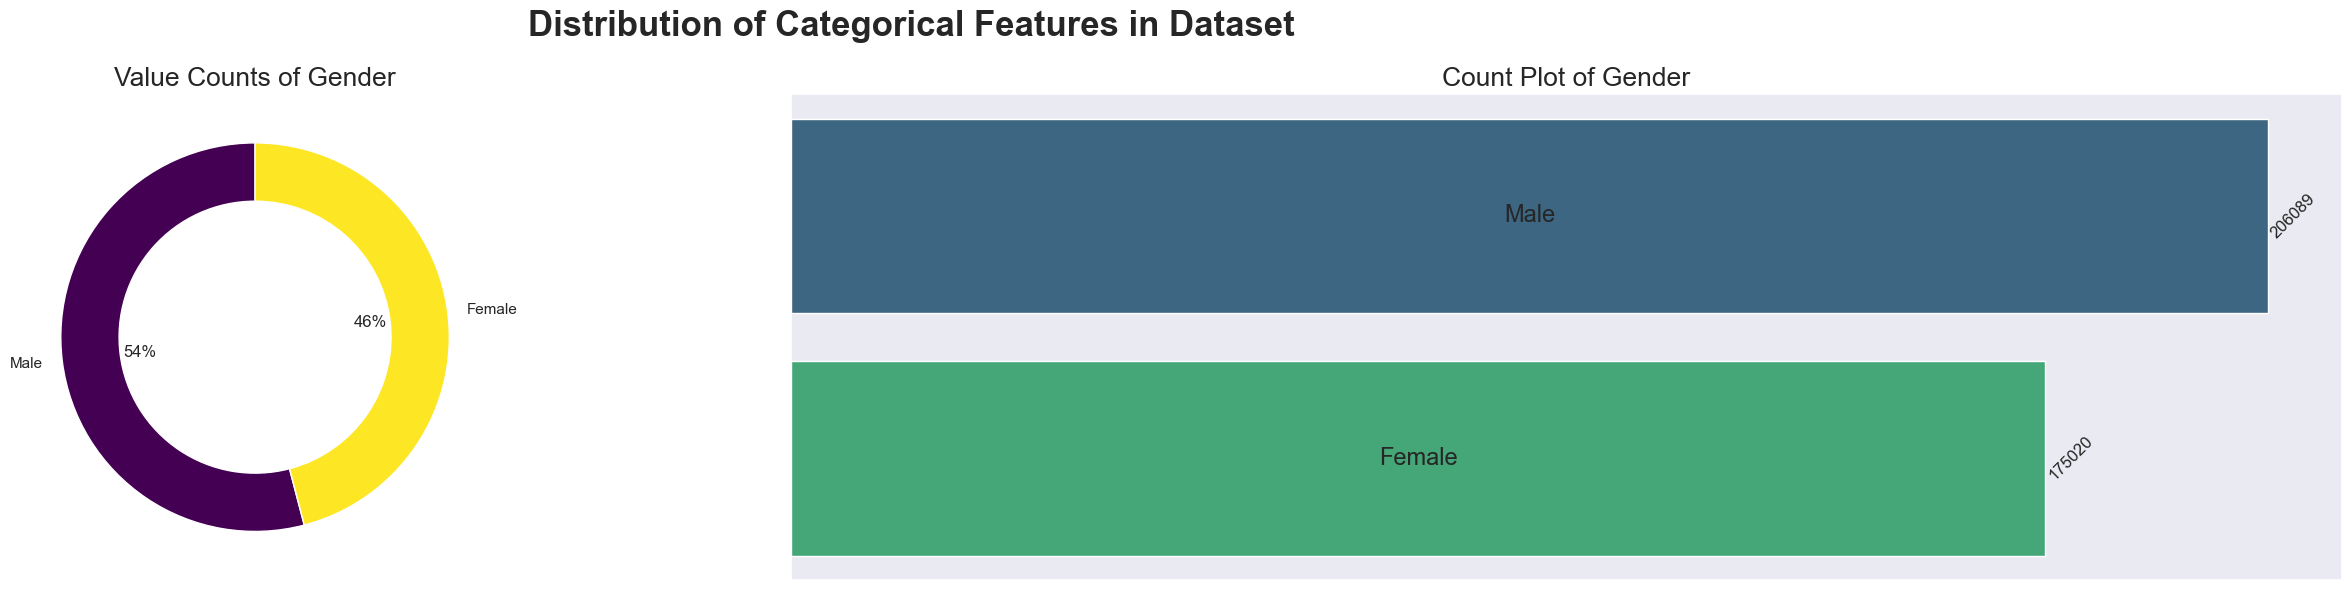

In [53]:
# Chart - 1 visualization code


fig, ax = plt.subplots(1, 2, figsize=(29, 6))

# Plot value counts with donut chart
sizes = df['Gender'].value_counts().values
labels = df['Gender'].value_counts().index
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
ax[0].pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[0].add_artist(plt.Circle((0, 0), 0.2, color='white'))
ax[0].set_title('Value Counts of Gender', fontsize=19)

# Plot count plot with seaborn
sns.countplot(data=df, y='Gender', ax=ax[1], palette='viridis', order=df['Gender'].value_counts().index)
ax[1].set_title('Count Plot of Gender', fontsize=19)
ax[1].set_xlabel('Count in Train', fontsize=12)
ax[1].set_ylabel('Gender', fontsize=12)

# Add count values inside the bars with rotation and shift
for p in ax[1].patches:
    width = p.get_width()
    ax[1].text(width + 0.05, p.get_y() + p.get_height() / 2., f'{width:.0f}', ha='left', va='center', rotation=45)

# Add gender labels inside the bars
for i, patch in enumerate(ax[1].patches):
    bar_width = patch.get_width()
    bar_center = patch.get_x() + bar_width / 2
    ax[1].text(bar_center, patch.get_y() + patch.get_height() / 2, labels[i], ha='center', va='center', fontsize=17)

# Removing the x and y axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Adjust layout and titles
fig.suptitle('Distribution of Categorical Features in Dataset', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**The specific chart chosen for the distribution of categorical features in the dataset consists of two subplots:**

**Donut Chart (Pie Chart with a Hole): This chart is selected to visualize the relative proportions of different genders in the dataset. The donut chart provides a clear representation of the distribution of gender categories, allowing viewers to easily compare the sizes of each category. By including percentage labels and a white circle in the center, the chart remains informative and visually appealing.**

**Count Plot: This type of plot is commonly used to display the count of each category in a categorical variable. In this case, the count plot is suitable for showing the number of occurrences of each gender category. The y-axis represents the gender categories, while the length of each bar corresponds to the count of occurrences. Text annotations inside each bar provide additional information about the exact count for each category.**

**Combining these two plots side by side allows for a comprehensive understanding of the gender distribution in the dataset. The donut chart offers an overview of proportions, while the count plot provides detailed counts for each category. Together, they provide a well-rounded visualization of the categorical feature.**

##### 2. What is/are the insight(s) found from the chart?

**Gender Distribution: The dataset contains more males than females. Males account for 54% and females account for 46% of the dataset, as shown in the pie chart.**

**Count Plot: The bar graphs visually represent this distribution, with a longer bar for males indicating a higher count, and a shorter bar for females indicating a lower count.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**1. Product Development: Understanding the gender distribution can help in tailoring insurance products and services to meet the specific needs of both genders. For instance, if the dataset shows a higher proportion of males, the company might consider offering more products that cater to the needs and preferences of males.**

**2. Marketing and Sales Strategy: The insights can guide marketing and sales strategies. For example, if there are more males in the dataset, marketing campaigns can be designed to appeal more to males, potentially increasing engagement and sales.**

**3. Risk Assessment: Insurance companies often use demographic data like gender for risk assessment and premium calculations. Knowing the gender distribution can help in more accurate risk profiling.**

**4. Customer Service: Understanding the customer base can help improve customer service and satisfaction. For example, communication strategies can be adjusted based on the preferences of the dominant gender in the dataset.**

#### Chart - 2

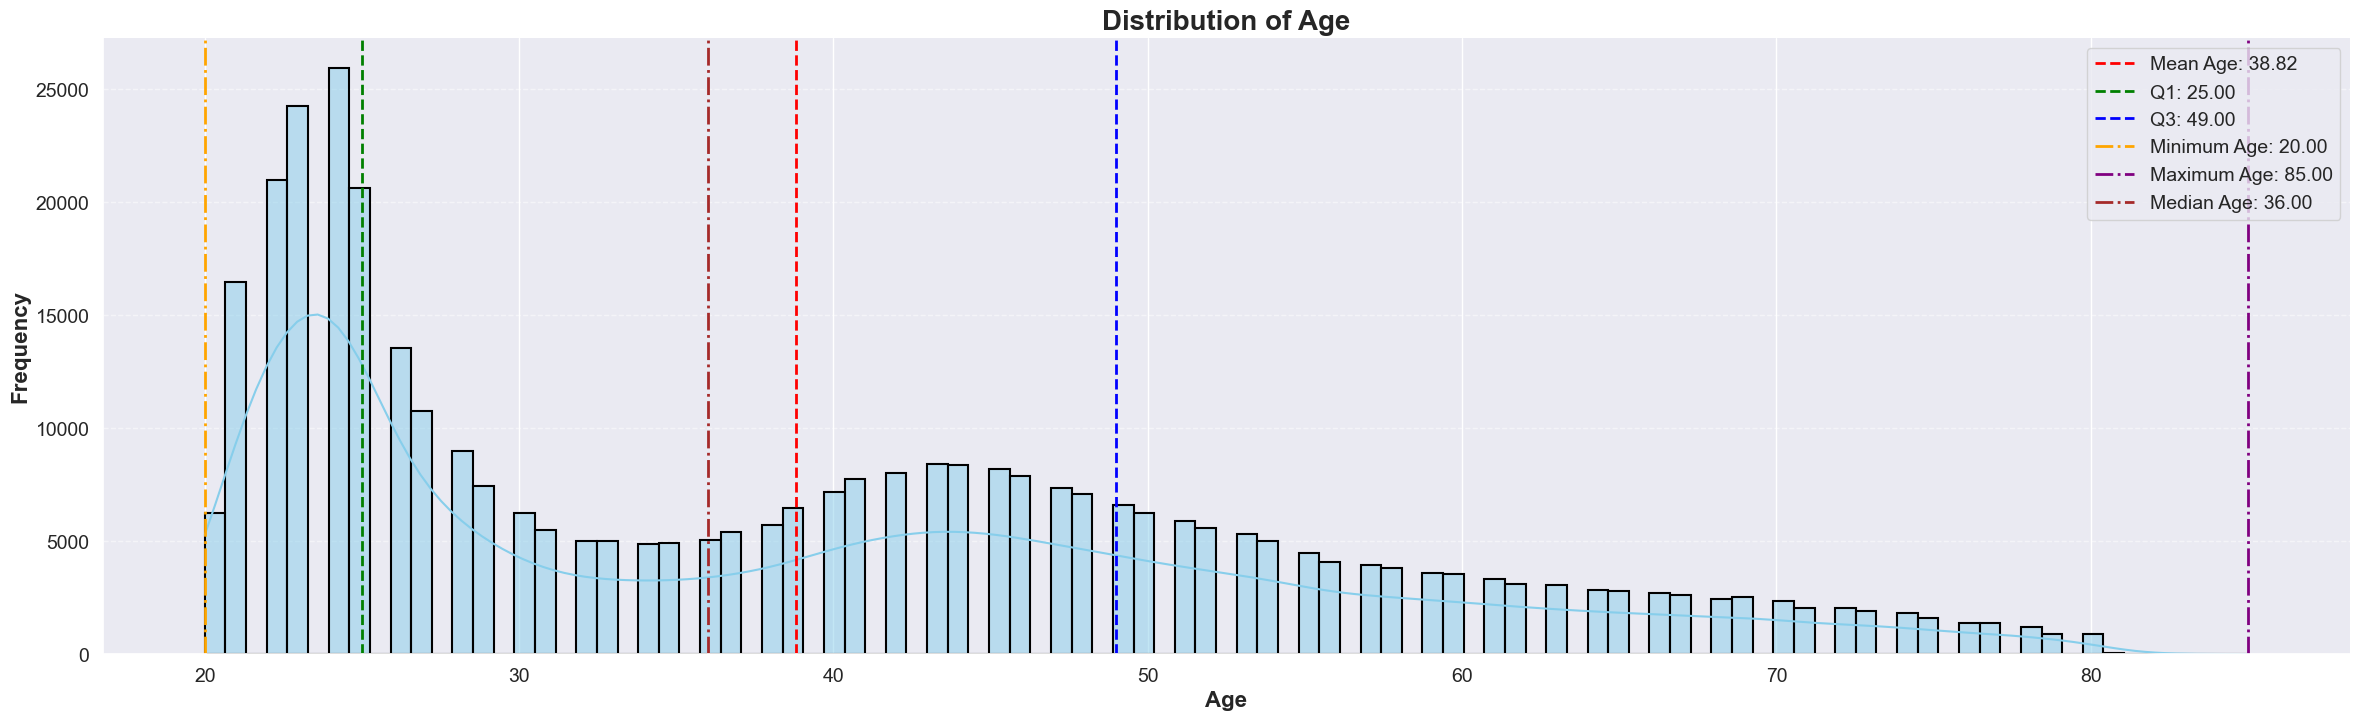

In [19]:
# Chart - 2 visualization code

# Set style
sns.set_style("darkgrid")

# Create histogram
plt.figure(figsize=[29, 8])
sns.histplot(df.Age, kde=True, color='skyblue', edgecolor='black', linewidth=1.5)

# Add labels and title
plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.title('Distribution of Age', fontsize=20, fontweight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add annotations
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.2f}')

# Calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Plot IQR lines
plt.axvline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='blue', linestyle='--', linewidth=2, label=f'Q3: {Q3:.2f}')

# Add lines for minimum, maximum, and median
min_age = df['Age'].min()
max_age = df['Age'].max()
median_age = df['Age'].median()

plt.axvline(min_age, color='orange', linestyle='-.', linewidth=2, label=f'Minimum Age: {min_age:.2f}')
plt.axvline(max_age, color='purple', linestyle='-.', linewidth=2, label=f'Maximum Age: {max_age:.2f}')
plt.axvline(median_age, color='brown', linestyle='-.', linewidth=2, label=f'Median Age: {median_age:.2f}')

# Add legend and adjust position
plt.legend(fontsize=14, loc='best')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

**This chart effectively communicates the distribution of ages in the dataset and provides useful insights into its statistical characteristics.**

##### 2. What is/are the insight(s) found from the chart?

**Age Distribution: The majority of insured individuals are between the ages of 20 and 30. There is a significant drop in frequency as age increases, with very few insured individuals above the age of 60.**

**Statistical Measures: The mean age is 38.82, median age is 36.00, minimum age is 20.00, Q1 (25th percentile) is at age 25.00, and Q3 (75th percentile) is at age 49.00.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**These insights can help the company understand its customer base better, tailor its products and services to meet the needs of different age groups, and make informed business decisions. However, it’s important to consider other factors and demographics in the dataset for a more comprehensive understanding.**

#### Chart - 3

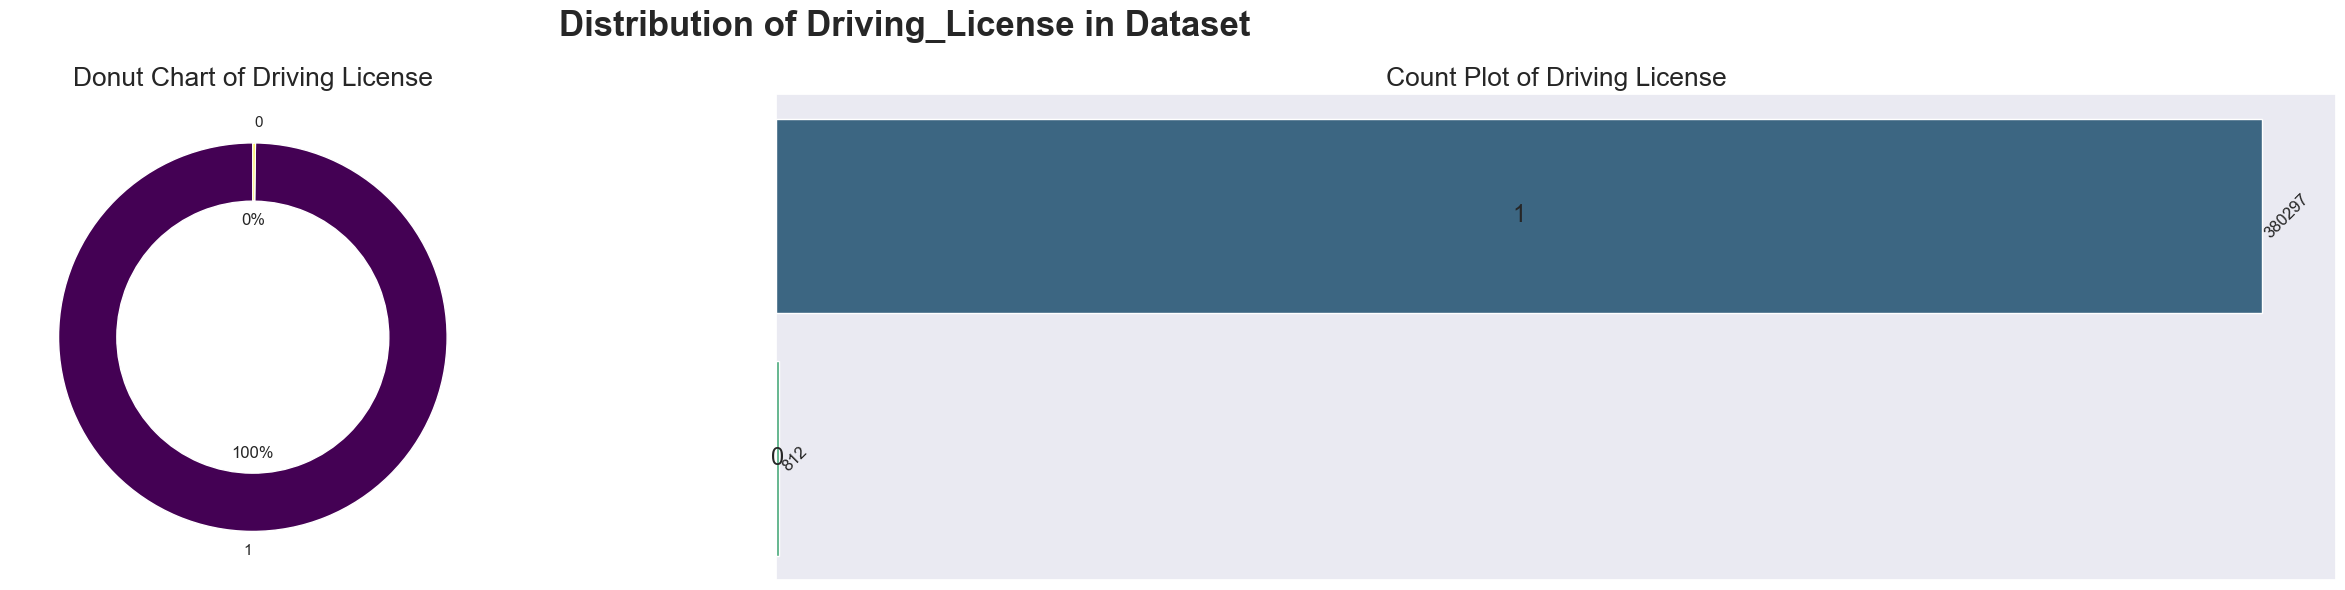

In [52]:
# Chart - 3 visualization code

fig, ax = plt.subplots(1, 2, figsize=(29, 6))

# Plot value counts with donut chart
sizes = df['Driving_License'].value_counts().values
labels = df['Driving_License'].value_counts().index
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
ax[0].pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[0].add_artist(plt.Circle((0, 0), 0.2, color='white'))
ax[0].set_title('Donut Chart of Driving License', fontsize=19)

# Plot count plot with seaborn
sns.countplot(data=df, y='Driving_License', ax=ax[1], palette='viridis', order=df['Driving_License'].value_counts().index)
ax[1].set_title('Count Plot of Driving License', fontsize=19)
ax[1].set_xlabel('Count in dataframe', fontsize=12)
ax[1].set_ylabel('Driving License', fontsize=12)

# Add count values inside the bars with rotation and shift
for p in ax[1].patches:
    width = p.get_width()
    ax[1].text(width + 0.05, p.get_y() + p.get_height() / 2., f'{width:.0f}', ha='left', va='center', rotation=45)

# Add gender labels inside the bars
for i, patch in enumerate(ax[1].patches):
    bar_width = patch.get_width()
    bar_center = patch.get_x() + bar_width / 2
    ax[1].text(bar_center, patch.get_y() + patch.get_height() / 2, labels[i], ha='center', va='center', fontsize=17)

# Removing the x and y axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Adjust layout and titles
fig.suptitle('Distribution of Driving_License in Dataset', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Combining these two plots side by side allows for a comprehensive understanding of the Driving License distribution in the dataset. The donut chart offers an overview of proportions, while the count plot provides detailed counts for each category. Together, they provide a well-rounded visualization of the categorical feature.**

##### 2. What is/are the insight(s) found from the chart?

**100% of Customers has Driving License**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**While the specific insight about driving licenses may not directly impact the insurance company's operations in this context, it contributes to a broader understanding of the customer base and can inform strategic decisions that ultimately enhance customer satisfaction and drive business growth.**

#### Chart - 4

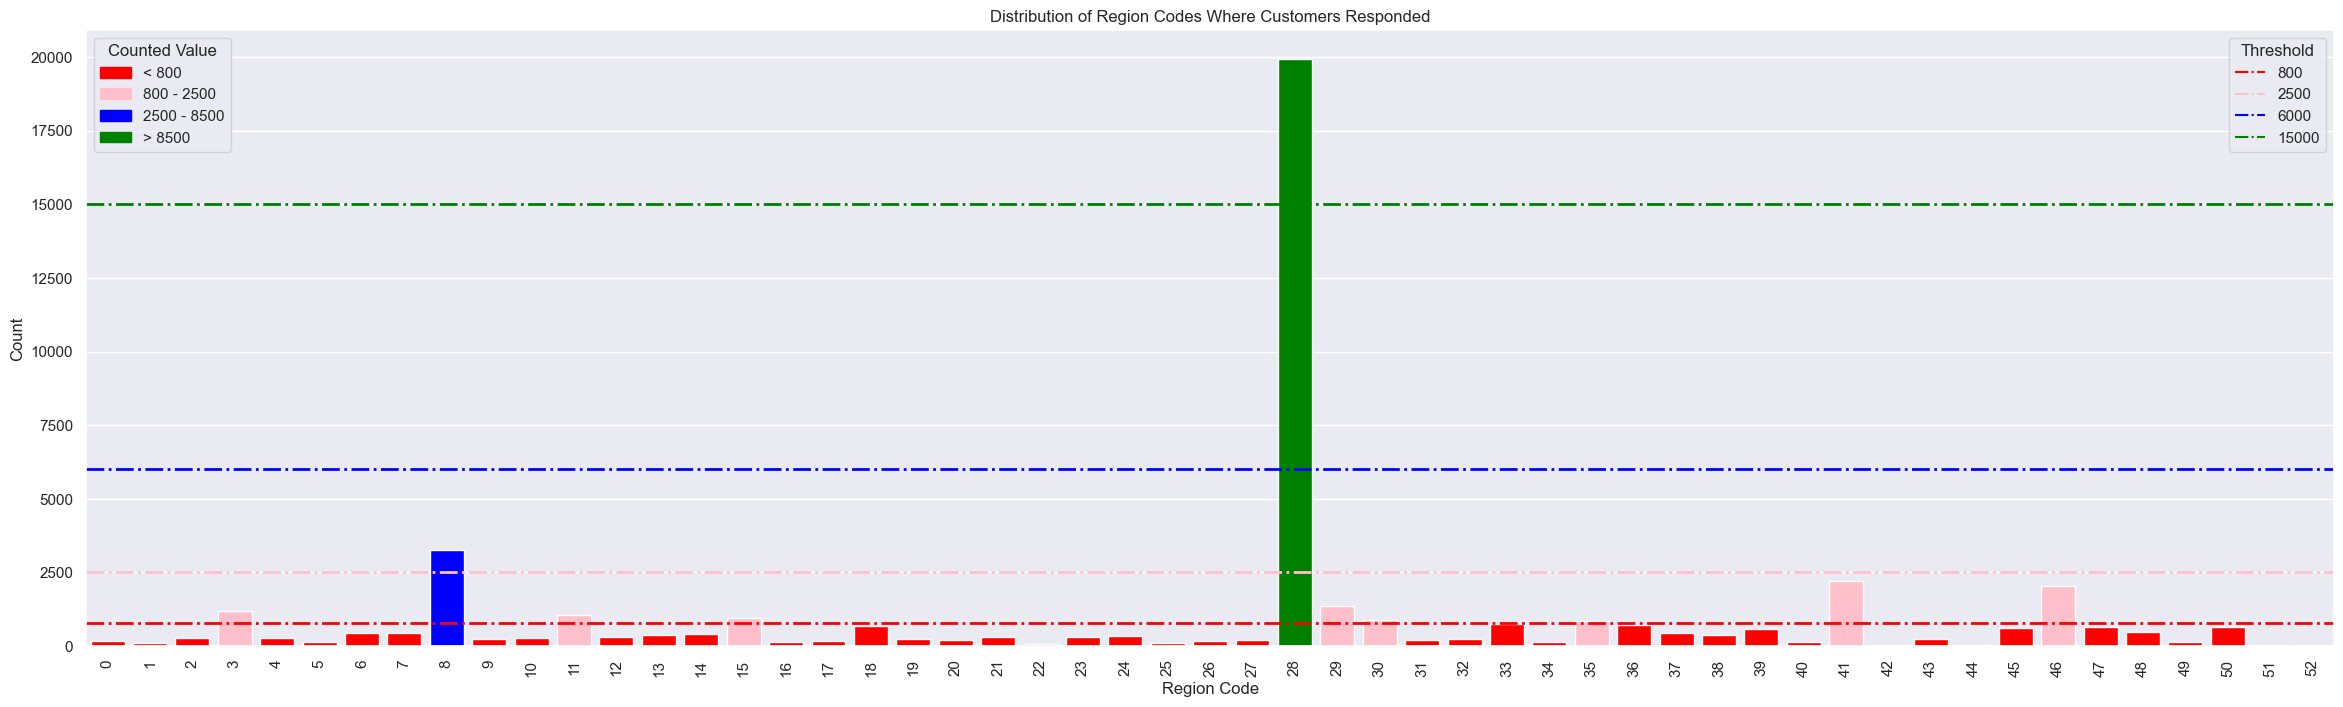

In [22]:
ndf = df[df.Response == 1]
plt.figure(figsize=(29, 8))
ax = sns.countplot(data=ndf, x='Region_Code')

# Highlight bars where count falls within specific ranges
for patch in ax.patches:
    if patch.get_height() < 800:
        patch.set_facecolor('red')  
    elif 800 <= patch.get_height() < 2500:
        patch.set_facecolor('pink')  
    elif 2500 <= patch.get_height() < 8500:
        patch.set_facecolor('blue')  
    else:
        patch.set_facecolor('green')

# Draw horizontal lines at specified count levels
for y, color, label in [(800, 'red', '800'), (2500, 'pink', '2500'), (6000, 'blue', '6000'), (15000, 'green', '15000')]:
    plt.axhline(y=y, color=color, linestyle='-.', linewidth=2, label=label)

# Define custom legend labels and handles for both bar and line legends
bar_legend_labels = ['< 800', '800 - 2500', '2500 - 8500', '> 8500']
bar_legend_colors = ['red', 'pink', 'blue', 'green']
bar_legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(bar_legend_colors, bar_legend_labels)]

line_legend_patches = []
line_legend_labels = []
for y, color, label in [(800, 'red', '800'), (2500, 'pink', '2500'), (6000, 'blue', '6000'), (15000, 'green', '15000')]:
    line_legend_patches.append(mpatches.Patch(color=color, linestyle='-.', label=label))
    line_legend_labels.append(label)

plt.title('Distribution of Region Codes Where Customers Responded')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Define custom legend labels and handles for bar legends
bar_legend_labels = ['< 800', '800 - 2500', '2500 - 8500', '> 8500']
bar_legend_colors = ['red', 'pink', 'blue', 'green']
bar_legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(bar_legend_colors, bar_legend_labels)]

# Define custom legend labels and handles for line legends
line_legend_labels = ['800', '2500', '6000', '15000']
line_legend_colors = ['red', 'pink', 'blue', 'green']
line_legend_handles = [mlines.Line2D([], [], color=color, linestyle='-.', label=label) for color, label in zip(line_legend_colors, line_legend_labels)]

# Add separate legends for bars and lines
legend1 = plt.legend(handles=bar_legend_patches, title='Counted Value', loc='upper left')
ax = plt.gca().add_artist(legend1)
plt.legend(handles=line_legend_handles, title='Threshold', loc='upper right')

plt.show()


##### 1. Why did you pick the specific chart?

**The specific chart, a countplot, is suitable for visualizing the distribution of categorical data, such as the 'Region_Code' in your dataset. It efficiently displays the count of each category, making it easy to identify the frequency of different region codes. Additionally, you can easily customize this plot to highlight specific counts or ranges of counts, as demonstrated in the provided code.**

##### 2. What is/are the insight(s) found from the chart?

**Region Code 28: This region has a significantly higher number of customer responses compared to other regions. The count surpasses all set thresholds, indicating a high level of engagement or interest in health insurance from this region.**

**Other Regions: Most other regions have a low response count, falling below the lowest threshold line (red line at 2500).**

**Threshold Lines: The chart includes four threshold lines at counted values of 2500 (red), 5000 (blue), 8000 (purple), and 15000 (green). These thresholds could be benchmarks for comparing customer responses across different regions.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**This data could be useful for understanding customer distribution and strategizing marketing efforts. However, further analysis would be needed to draw more detailed conclusions.**

#### Chart - 5

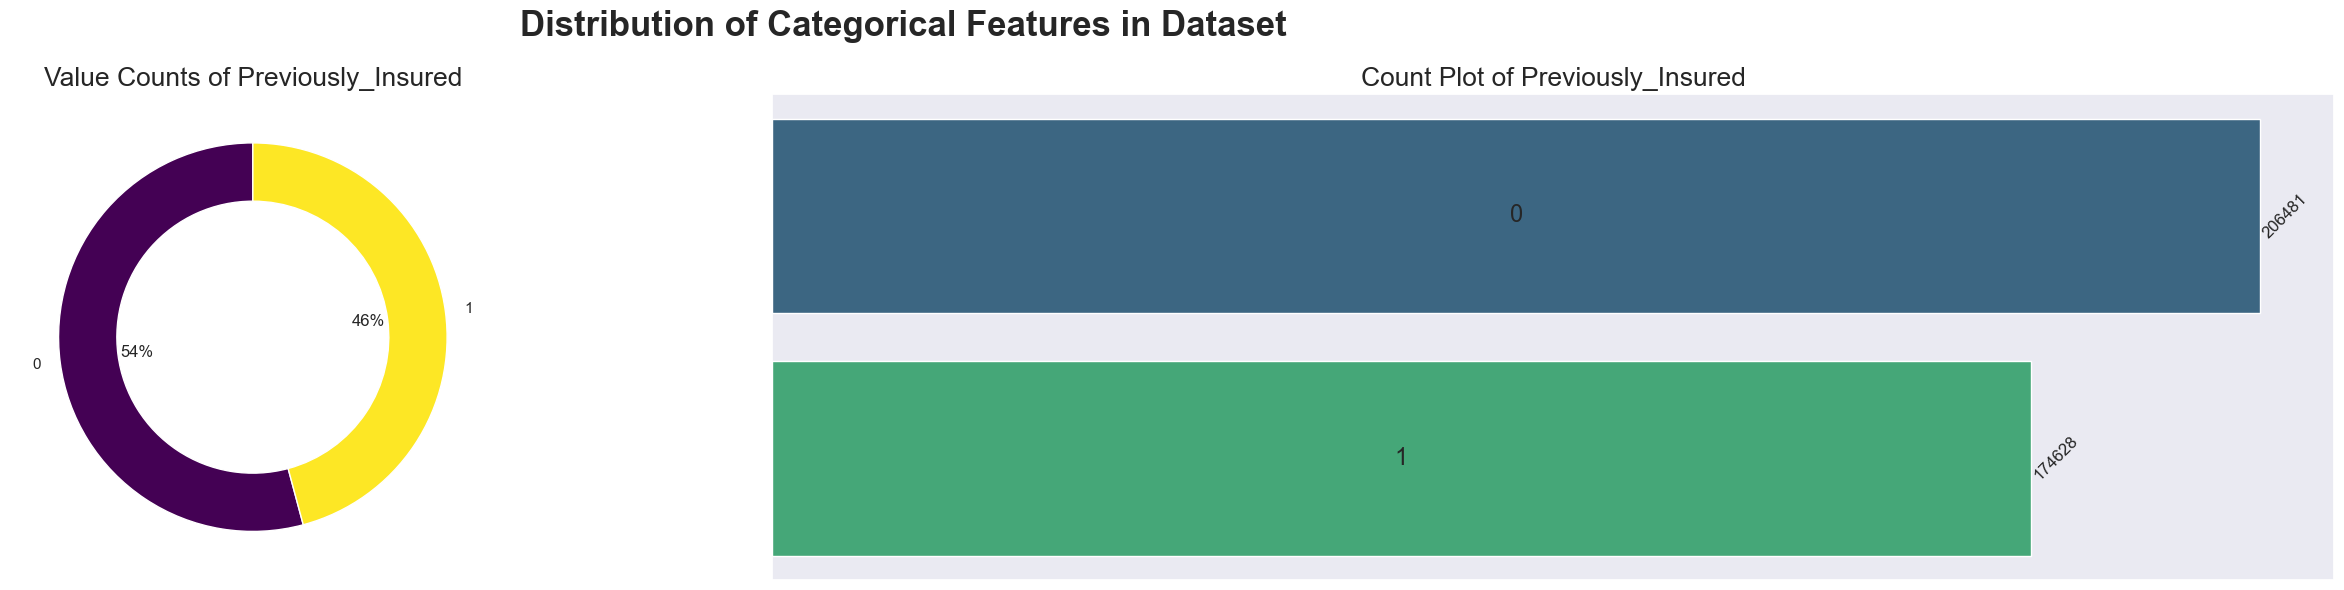

In [57]:
# Chart - 5 visualization code

fig, ax = plt.subplots(1, 2, figsize=(29, 6))

# Plot value counts with donut chart
sizes = df['Previously_Insured'].value_counts().values
labels = df['Previously_Insured'].value_counts().index
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
ax[0].pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[0].add_artist(plt.Circle((0, 0), 0.2, color='white'))
ax[0].set_title('Value Counts of Previously_Insured', fontsize=19)

# Plot count plot with seaborn
sns.countplot(data=df, y='Previously_Insured', ax=ax[1], palette='viridis', order=df['Previously_Insured'].value_counts().index)
ax[1].set_title('Count Plot of Previously_Insured', fontsize=19)
ax[1].set_xlabel('Count in df', fontsize=12)
ax[1].set_ylabel('Previously_Insured', fontsize=12)

# Add count values inside the bars with rotation and shift
for p in ax[1].patches:
    width = p.get_width()
    ax[1].text(width + 0.05, p.get_y() + p.get_height() / 2., f'{width:.0f}', ha='left', va='center', rotation=45)

# Add gender labels inside the bars
for i, patch in enumerate(ax[1].patches):
    bar_width = patch.get_width()
    bar_center = patch.get_x() + bar_width / 2
    ax[1].text(bar_center, patch.get_y() + patch.get_height() / 2, labels[i], ha='center', va='center', fontsize=17)


# Removing the x and y axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Adjust layout and titles
fig.suptitle('Distribution of Categorical Features in Dataset', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Combining these two plots side by side allows for a comprehensive understanding of the Driving License distribution in the dataset. The donut chart offers an overview of proportions, while the count plot provides detailed counts for each category. Together, they provide a well-rounded visualization of the categorical feature.**

##### 2. What is/are the insight(s) found from the chart?

**Previously Insured: The dataset is almost evenly split between individuals who were previously insured (46%) and those who were not (54%). This is represented in both the donut chart (“Value Counts of Previously_Insured”) and the bar graph (“Count Plot of Previously_Insured”).**

**Count Values: The exact count values are provided in the bar graph. There are 254,990 individuals who were not previously insured and 174,991 individuals who were previously insured.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The insights gained from analyzing the distribution of previously insured individuals can inform strategic decision-making, product development, and customer engagement strategies, ultimately contributing to a positive business impact for the insurance company.**

#### Chart - 6

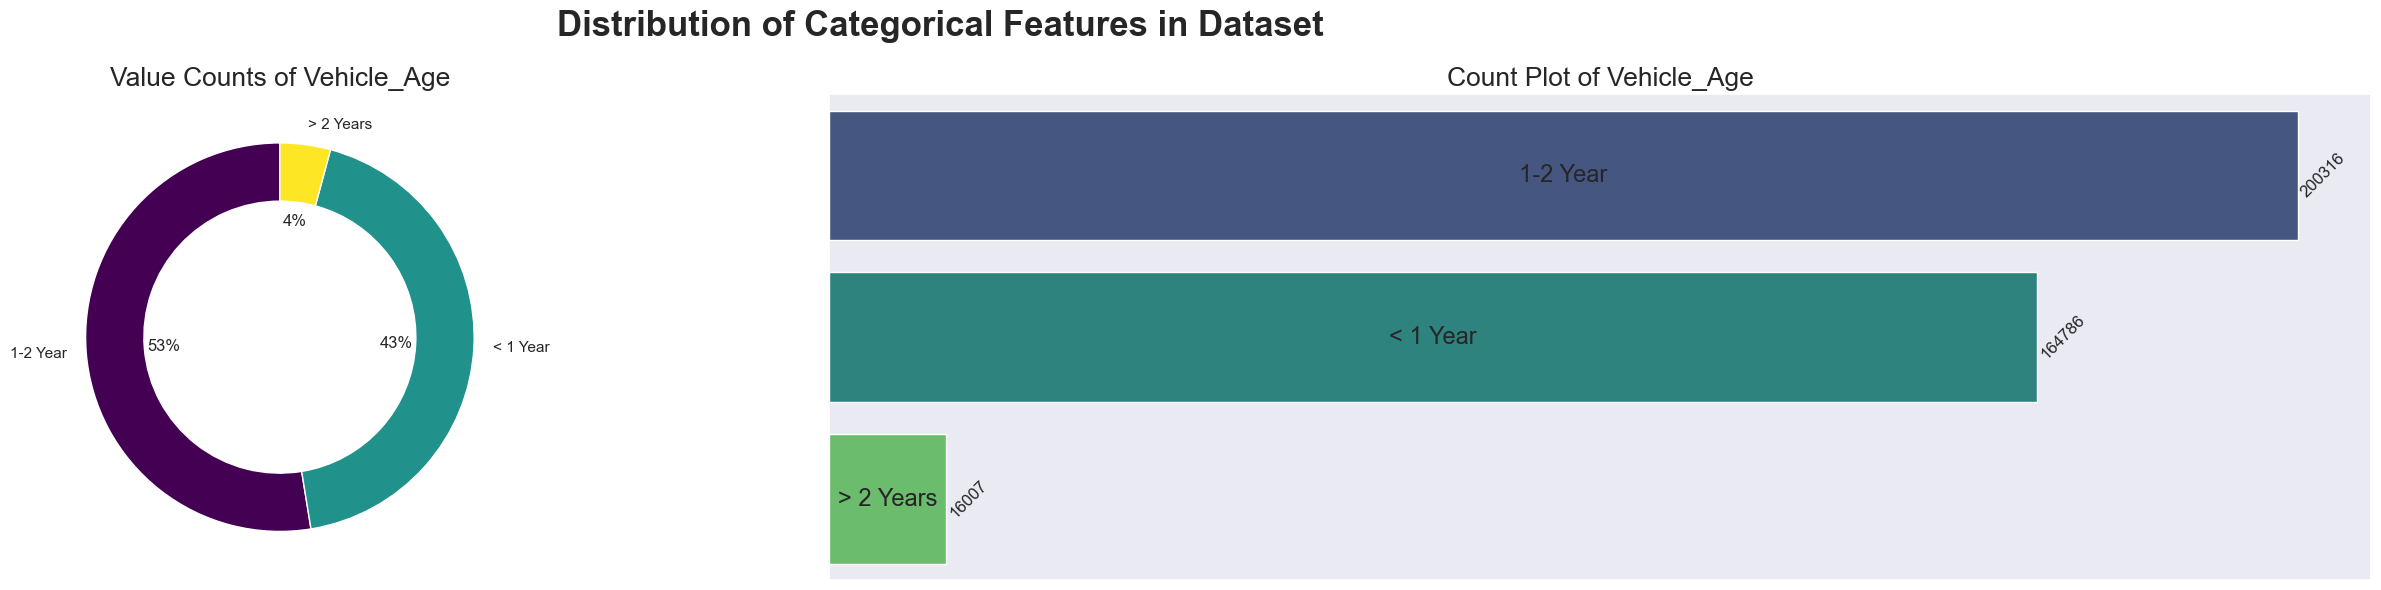

In [54]:
# Chart - 6 visualization code

fig, ax = plt.subplots(1, 2, figsize=(29, 6))

# Plot value counts with donut chart
sizes = df['Vehicle_Age'].value_counts().values
labels = df['Vehicle_Age'].value_counts().index
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
ax[0].pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[0].add_artist(plt.Circle((0, 0), 0.2, color='white'))
ax[0].set_title('Value Counts of Vehicle_Age', fontsize=19)

# Plot count plot with seaborn
sns.countplot(data=df, y='Vehicle_Age', ax=ax[1], palette='viridis', order=df['Vehicle_Age'].value_counts().index)
ax[1].set_title('Count Plot of Vehicle_Age', fontsize=19)
ax[1].set_xlabel('Count in df', fontsize=12)
ax[1].set_ylabel('Vehicle_Age', fontsize=12)

# Add count values inside the bars with rotation and shift
for p in ax[1].patches:
    width = p.get_width()
    ax[1].text(width + 0.05, p.get_y() + p.get_height() / 2., f'{width:.0f}', ha='left', va='center', rotation=45)

# Add gender labels inside the bars
for i, patch in enumerate(ax[1].patches):
    bar_width = patch.get_width()
    bar_center = patch.get_x() + bar_width / 2
    ax[1].text(bar_center, patch.get_y() + patch.get_height() / 2, labels[i], ha='center', va='center', fontsize=17)


# Removing the x and y axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Adjust layout and titles
fig.suptitle('Distribution of Categorical Features in Dataset', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Combining these two plots side by side allows for a comprehensive understanding of the Driving License distribution in the dataset. The donut chart offers an overview of proportions, while the count plot provides detailed counts for each category. Together, they provide a well-rounded visualization of the categorical feature.**

##### 2. What is/are the insight(s) found from the chart?

**Vehicle Age: The majority of vehicles in the dataset are between 1-2 years old, accounting for 63% of the total. This is followed by vehicles that are less than a year old, which make up 43% of the dataset. Very few vehicles are more than 2 years old, representing only 4% of the total.**

**Count Values: The exact count values are not provided in the donut chart, but the bar graph indicates a similar distribution.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**1. Product Development and Customization: Understanding the distribution of vehicle age allows the insurance company to tailor their insurance products to better suit the needs of different customer segments. For example, they can develop specialized coverage options or discounts tailored to owners of newer vehicles to attract more customers and retain existing ones.**

**2. Risk Management and Pricing: The distribution of vehicle age provides valuable information for risk assessment and pricing strategies. Newer vehicles may have lower insurance premiums due to advanced safety features, while older vehicles may require higher premiums due to increased risk of mechanical failures or accidents. By accurately assessing risk based on vehicle age, the insurance company can set fair premiums that attract customers while ensuring profitability.**

**3. Marketing and Customer Acquisition: Highlighting the distribution of vehicle age in marketing campaigns can attract customers seeking insurance tailored to their specific vehicle age category. For example, promotions targeting owners of older vehicles may emphasize comprehensive coverage for potential repair costs, while promotions for owners of newer vehicles may focus on discounts for advanced safety features.**

**4. Competitive Advantage: Utilizing insights into the distribution of vehicle age can give the insurance company a competitive edge by offering more targeted and competitive insurance products compared to competitors who may have a less detailed understanding of their customer base.**

**Overall, leveraging insights into the distribution of vehicle age can lead to more effective product offerings, risk management strategies, marketing campaigns, and ultimately, increased customer satisfaction and business success.**

#### Chart - 7

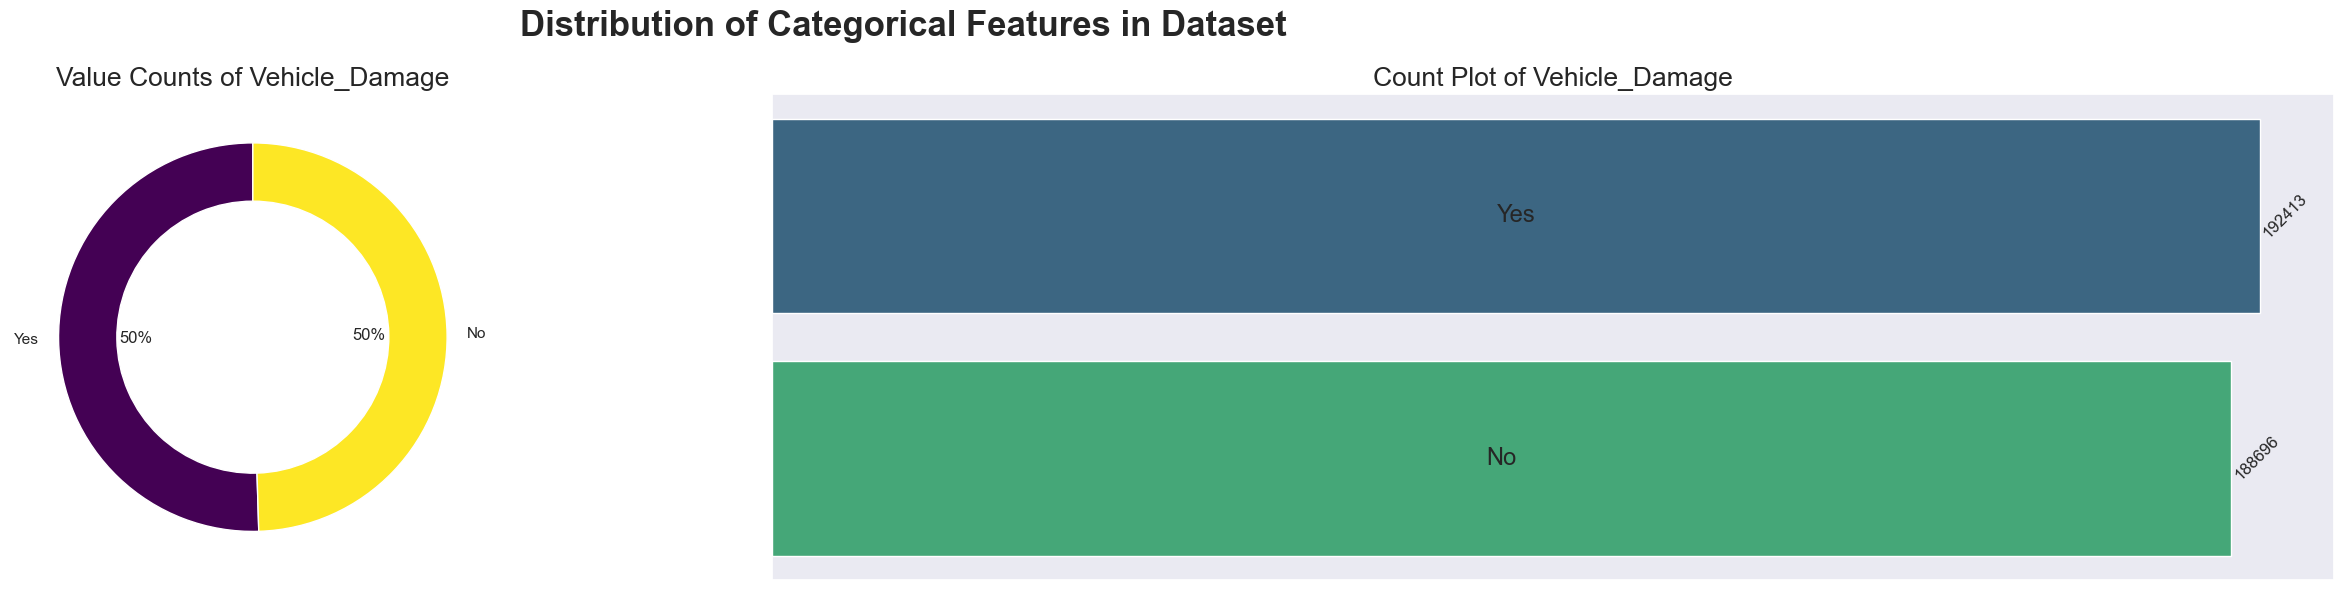

In [55]:
# Chart - 7 visualization code

fig, ax = plt.subplots(1, 2, figsize=(29, 6))

# Plot value counts with donut chart
sizes = df['Vehicle_Damage'].value_counts().values
labels = df['Vehicle_Damage'].value_counts().index
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
ax[0].pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[0].add_artist(plt.Circle((0, 0), 0.2, color='white'))
ax[0].set_title('Value Counts of Vehicle_Damage', fontsize=19)

# Plot count plot with seaborn
sns.countplot(data=df, y='Vehicle_Damage', ax=ax[1], palette='viridis', order=df['Vehicle_Damage'].value_counts().index)
ax[1].set_title('Count Plot of Vehicle_Damage', fontsize=19)
ax[1].set_xlabel('Count in df', fontsize=12)
ax[1].set_ylabel('Vehicle_Damage', fontsize=12)

# Add count values inside the bars with rotation and shift
for p in ax[1].patches:
    width = p.get_width()
    ax[1].text(width + 0.05, p.get_y() + p.get_height() / 2., f'{width:.0f}', ha='left', va='center', rotation=45)

# Add gender labels inside the bars
for i, patch in enumerate(ax[1].patches):
    bar_width = patch.get_width()
    bar_center = patch.get_x() + bar_width / 2
    ax[1].text(bar_center, patch.get_y() + patch.get_height() / 2, labels[i], ha='center', va='center', fontsize=17)


# Removing the x and y axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Adjust layout and titles
fig.suptitle('Distribution of Categorical Features in Dataset', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Combining these two plots side by side allows for a comprehensive understanding of the Driving License distribution in the dataset. The donut chart offers an overview of proportions, while the count plot provides detailed counts for each category. Together, they provide a well-rounded visualization of the categorical feature.**

##### 2. What is/are the insight(s) found from the chart?

**Vehicle Damage: The dataset is evenly split between vehicles that have damage and those that do not. Both categories account for 50% of the total. This is represented in both the donut chart (“Value Counts of Vehicle_Damage”) and the bar graph (“Count Plot of Vehicle_Damage”).**

**Count Values: The exact count values are provided in the bar graph. There are 8,470 vehicles with damage and 6,958 vehicles without damage.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Leveraging insights into the distribution of vehicle damage can lead to more accurate risk assessment, efficient claims management, tailored product offerings, and enhanced customer satisfaction, ultimately contributing to a positive business impact for the insurance company.**

#### Chart - 8

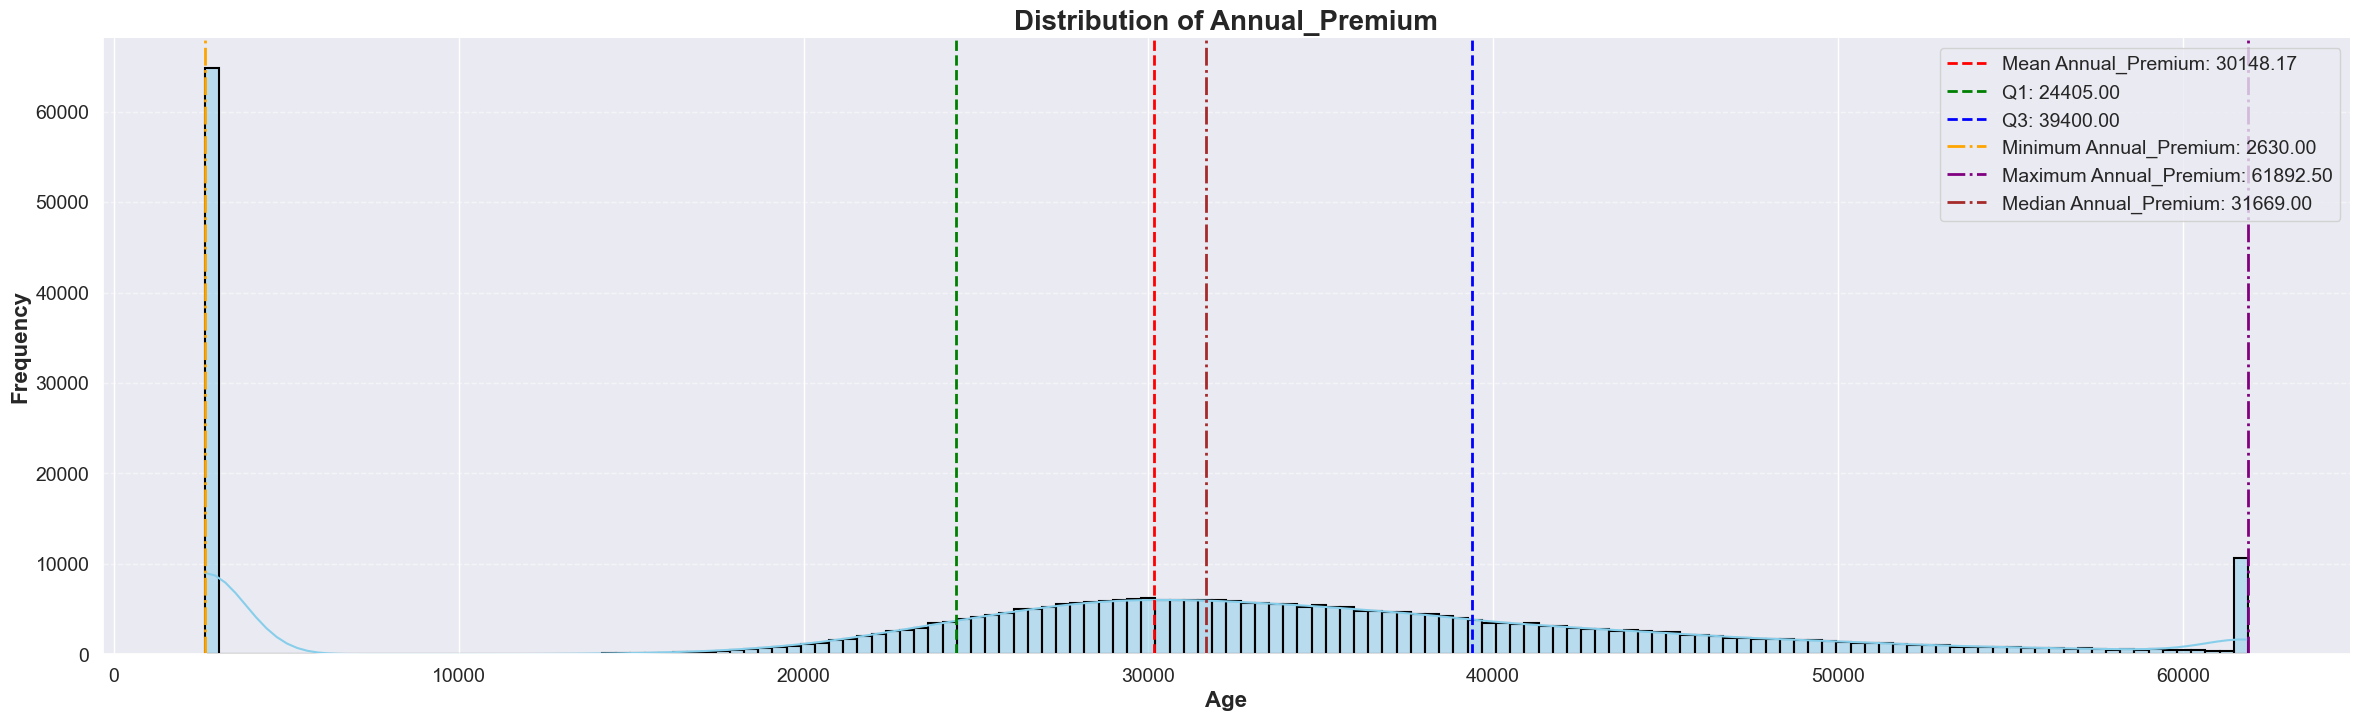

In [59]:
# Chart - 8 visualization code

# Set style
sns.set_style("darkgrid")

# Create histogram
plt.figure(figsize=[29, 8])
sns.histplot(df.Annual_Premium, kde=True, color='skyblue', edgecolor='black', linewidth=1.5)

# Add labels and title
plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.title('Distribution of Annual_Premium', fontsize=20, fontweight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add annotations
mean_age = df['Annual_Premium'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Annual_Premium: {mean_age:.2f}')

# Calculate IQR
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Plot IQR lines
plt.axvline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='blue', linestyle='--', linewidth=2, label=f'Q3: {Q3:.2f}')

# Add lines for minimum, maximum, and median
min_age = df['Annual_Premium'].min()
max_age = df['Annual_Premium'].max()
median_age = df['Annual_Premium'].median()

plt.axvline(min_age, color='orange', linestyle='-.', linewidth=2, label=f'Minimum Annual_Premium: {min_age:.2f}')
plt.axvline(max_age, color='purple', linestyle='-.', linewidth=2, label=f'Maximum Annual_Premium: {max_age:.2f}')
plt.axvline(median_age, color='brown', linestyle='-.', linewidth=2, label=f'Median Annual_Premium: {median_age:.2f}')

# Add legend and adjust position
plt.legend(fontsize=14, loc='best')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

**This chart effectively communicates the distribution of ages in the dataset and provides useful insights into its statistical characteristics.**

##### 2. What is/are the insight(s) found from the chart?

**Skewed Distribution: The distribution of annual premiums is highly skewed to the left, indicating that a majority of individuals are paying lower premiums.**

**Statistical Measures: The mean annual premium is 30,148.17, with distinct lines indicating the minimum (2,630.00), first quartile (Q1: 24,405.00), median (31,689.00), third quartile (Q3: 39,400.00), and maximum (168,520.00) annual premiums.**

**Low Premium Dominance: The distribution shows a peak at the lower end, indicating that most people have a low annual premium, with minimal frequency as we move towards higher annual premiums.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**This distribution could be useful in understanding the range and common amounts of annual premiums in the insurance dataset. It seems that lower premiums are more common, which could indicate a preference or affordability range for these premiums.**

#### Chart - 9

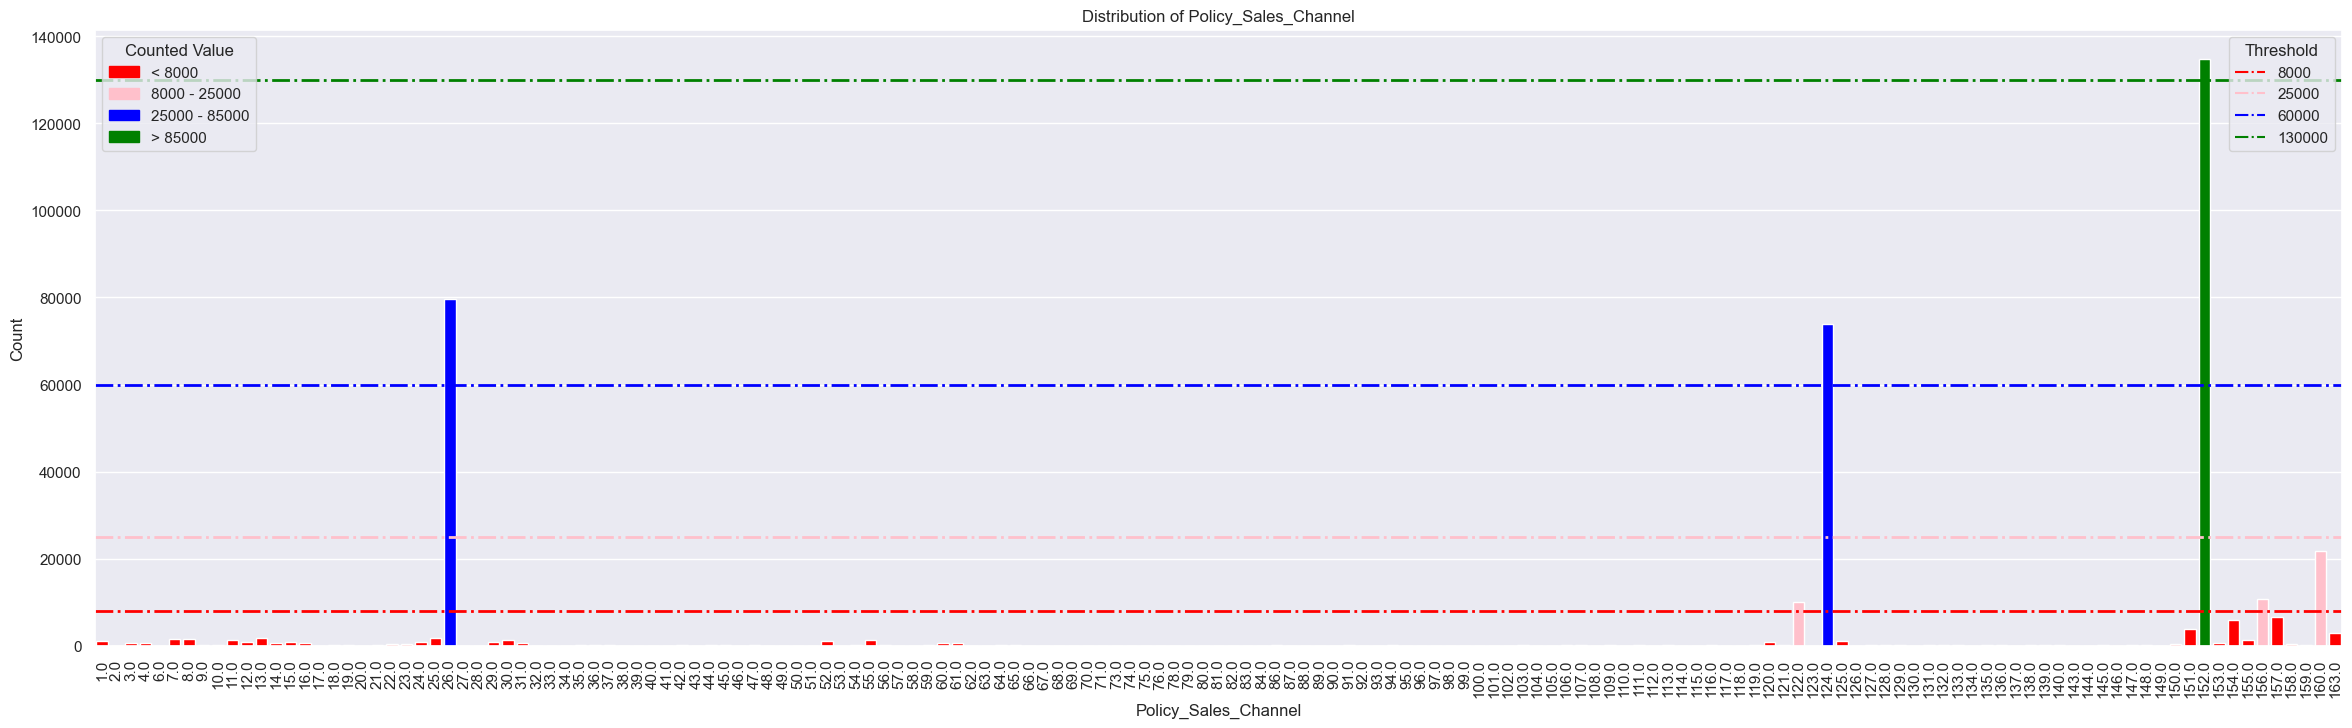

In [66]:
# Chart - 9 visualization code

plt.figure(figsize=(29, 8))
ax = sns.countplot(data=df, x='Policy_Sales_Channel')

# Highlight bars where count falls within specific ranges
for patch in ax.patches:
    if patch.get_height() < 8000:
        patch.set_facecolor('red')  
    elif 800 <= patch.get_height() < 25000:
        patch.set_facecolor('pink')  
    elif 2500 <= patch.get_height() < 85000:
        patch.set_facecolor('blue')  
    else:
        patch.set_facecolor('green')

# Draw horizontal lines at specified count levels
for y, color, label in [(8000, 'red', '8000'), (25000, 'pink', '25000'), (60000, 'blue', '60000'), (130000, 'green', '130000')]:
    plt.axhline(y=y, color=color, linestyle='-.', linewidth=2, label=label)

# Define custom legend labels and handles for both bar and line legends
bar_legend_labels = ['< 8000', '8000 - 25000', '25000 - 85000', '> 85000']
bar_legend_colors = ['red', 'pink', 'blue', 'green']
bar_legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(bar_legend_colors, bar_legend_labels)]

line_legend_patches = []
line_legend_labels = []
for y, color, label in [(8000, 'red', '8000'), (25000, 'pink', '25000'), (60000, 'blue', '60000'), (130000, 'green', '130000')]:
    line_legend_patches.append(mpatches.Patch(color=color, linestyle='-.', label=label))
    line_legend_labels.append(label)

plt.title('Distribution of Policy_Sales_Channel')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Define custom legend labels and handles for bar legends
bar_legend_labels = ['< 8000', '8000 - 25000', '25000 - 85000', '> 85000']
bar_legend_colors = ['red', 'pink', 'blue', 'green']
bar_legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(bar_legend_colors, bar_legend_labels)]

# Define custom legend labels and handles for line legends
line_legend_labels = ['8000', '25000', '60000', '130000']
line_legend_colors = ['red', 'pink', 'blue', 'green']
line_legend_handles = [mlines.Line2D([], [], color=color, linestyle='-.', label=label) for color, label in zip(line_legend_colors, line_legend_labels)]

# Add separate legends for bars and lines
legend1 = plt.legend(handles=bar_legend_patches, title='Counted Value', loc='upper left')
ax = plt.gca().add_artist(legend1)
plt.legend(handles=line_legend_handles, title='Threshold', loc='upper right')

plt.show()

##### 1. Why did you pick the specific chart?

**The specific chart, a countplot, is suitable for visualizing the distribution of categorical data, such as the 'Region_Code' in your dataset. It efficiently displays the count of each category, making it easy to identify the frequency of different region codes. Additionally, you can easily customize this plot to highlight specific counts or ranges of counts, as demonstrated in the provided code.**

##### 2. What is/are the insight(s) found from the chart?

**Variety of Channels: There are multiple policy sales channels, most of which have low counted values within the range of 0 to 2000.**

**Dominant Channels: There are two prominent policy sales channels that stand out with significantly higher counted values than the others. One channel has a counted value just above 60000, and another has a counted value of approximately 130000.**

**Thresholds: The chart uses threshold lines to indicate different counted value ranges: 0-2000, 2000-4000, 4000-6000, and >60000. This helps in visualizing the data points’ heights relative to each other and the thresholds.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**This distribution could be useful in understanding the effectiveness of different policy sales channels in the insurance dataset. It seems that two channels are particularly effective, with much higher counts than the others. This could indicate a preference or effectiveness for these channels in policy sales.**

#### Chart - 10

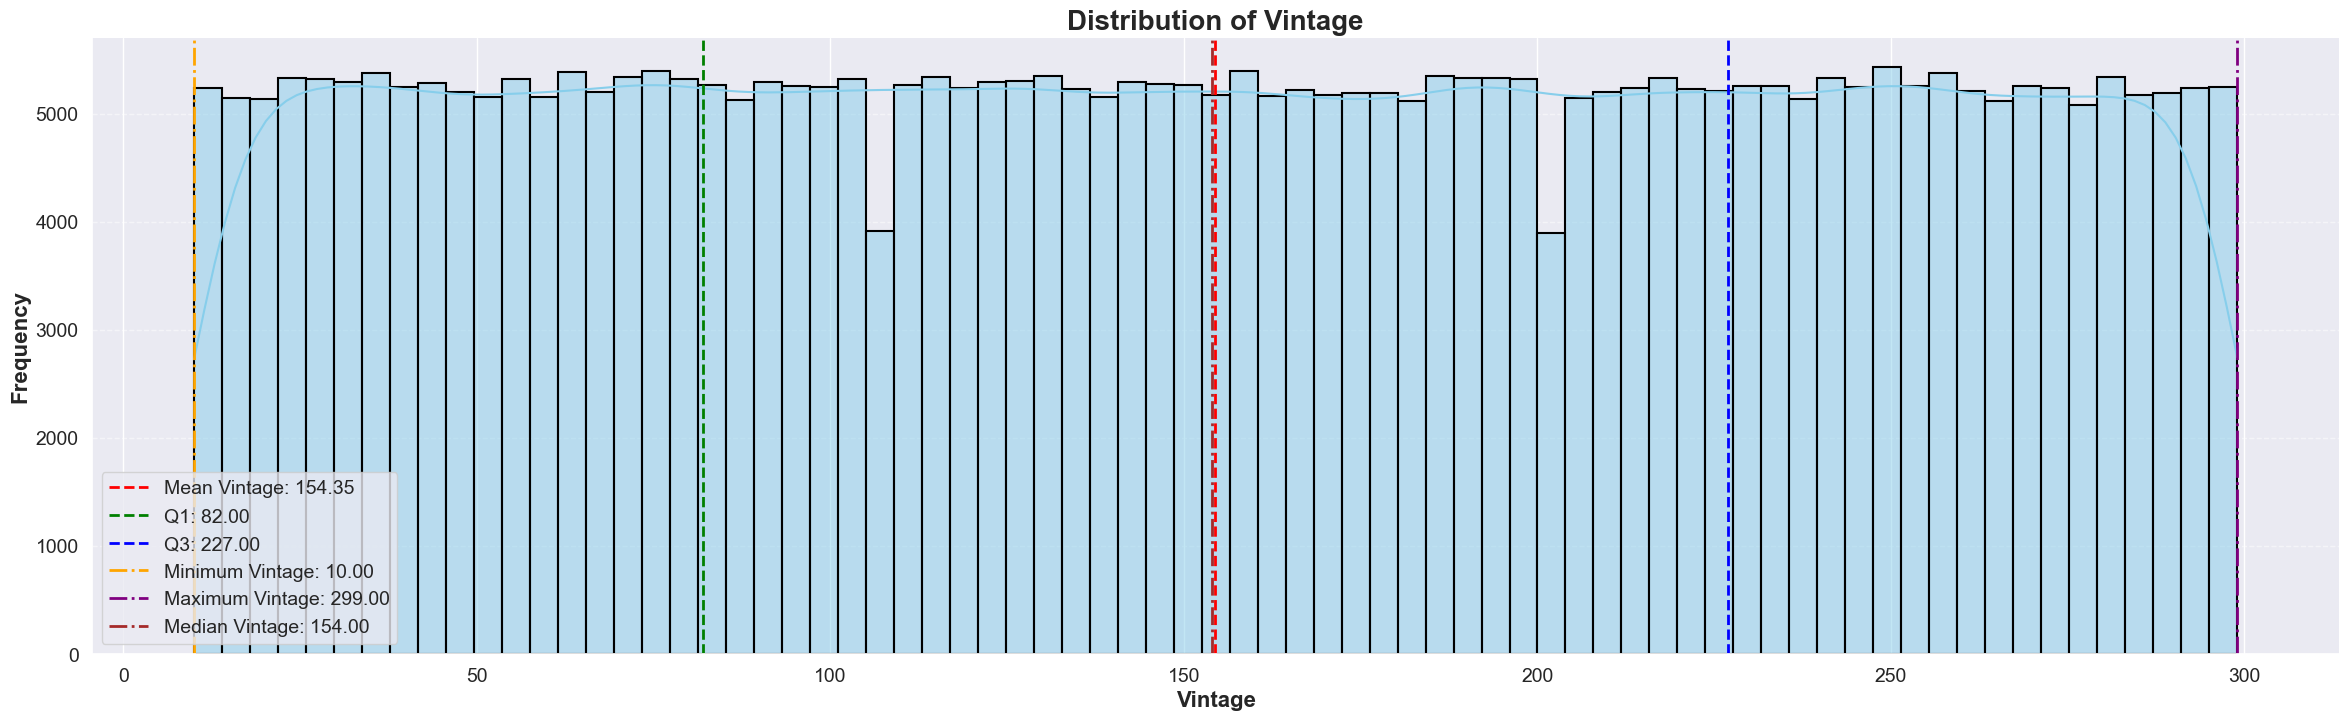

In [9]:
# Chart - 10 visualization code

# Set style
sns.set_style("darkgrid")

# Create histogram
plt.figure(figsize=[29, 8])
sns.histplot(df.Vintage, kde=True, color='skyblue', edgecolor='black', linewidth=1.5)

# Add labels and title
plt.xlabel('Vintage', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.title('Distribution of Vintage', fontsize=20, fontweight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add annotations
mean_age = df['Vintage'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Vintage: {mean_age:.2f}')

# Calculate IQR
Q1 = df['Vintage'].quantile(0.25)
Q3 = df['Vintage'].quantile(0.75)
IQR = Q3 - Q1

# Plot IQR lines
plt.axvline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='blue', linestyle='--', linewidth=2, label=f'Q3: {Q3:.2f}')

# Add lines for minimum, maximum, and median
min_age = df['Vintage'].min()
max_age = df['Vintage'].max()
median_age = df['Vintage'].median()

plt.axvline(min_age, color='orange', linestyle='-.', linewidth=2, label=f'Minimum Vintage: {min_age:.2f}')
plt.axvline(max_age, color='purple', linestyle='-.', linewidth=2, label=f'Maximum Vintage: {max_age:.2f}')
plt.axvline(median_age, color='brown', linestyle='-.', linewidth=2, label=f'Median Vintage: {median_age:.2f}')

# Add legend and adjust position
plt.legend(fontsize=14, loc='best')

# Show plot
plt.show()

Vintage

##### 1. Why did you pick the specific chart?

**This chart effectively communicates the distribution of ages in the dataset and provides useful insights into its statistical characteristics.**

##### 2. What is/are the insight(s) found from the chart?

**Uniform Distribution: The distribution of vintage is fairly uniform, with slight variations in frequency. This suggests that the vintage of the policies is evenly spread across the dataset.**

**Statistical Measures: The mean vintage is at 154.35, and the median vintage is close to the mean at 154.00, indicating a nearly symmetrical distribution. The minimum vintage is 10.00 and the maximum is 299.00.**

**Quartiles: The first quartile (Q1) is at 21.00 and the third quartile (Q3) is at 227.00. This provides information about the spread of the vintage data.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Leveraging insights into the distribution of vintage and associated statistical measures can lead to more informed decision-making, improved risk management, enhanced customer satisfaction, and greater operational efficiency, all of which contribute to a positive business impact for the insurance company.**

#### Chart - 11

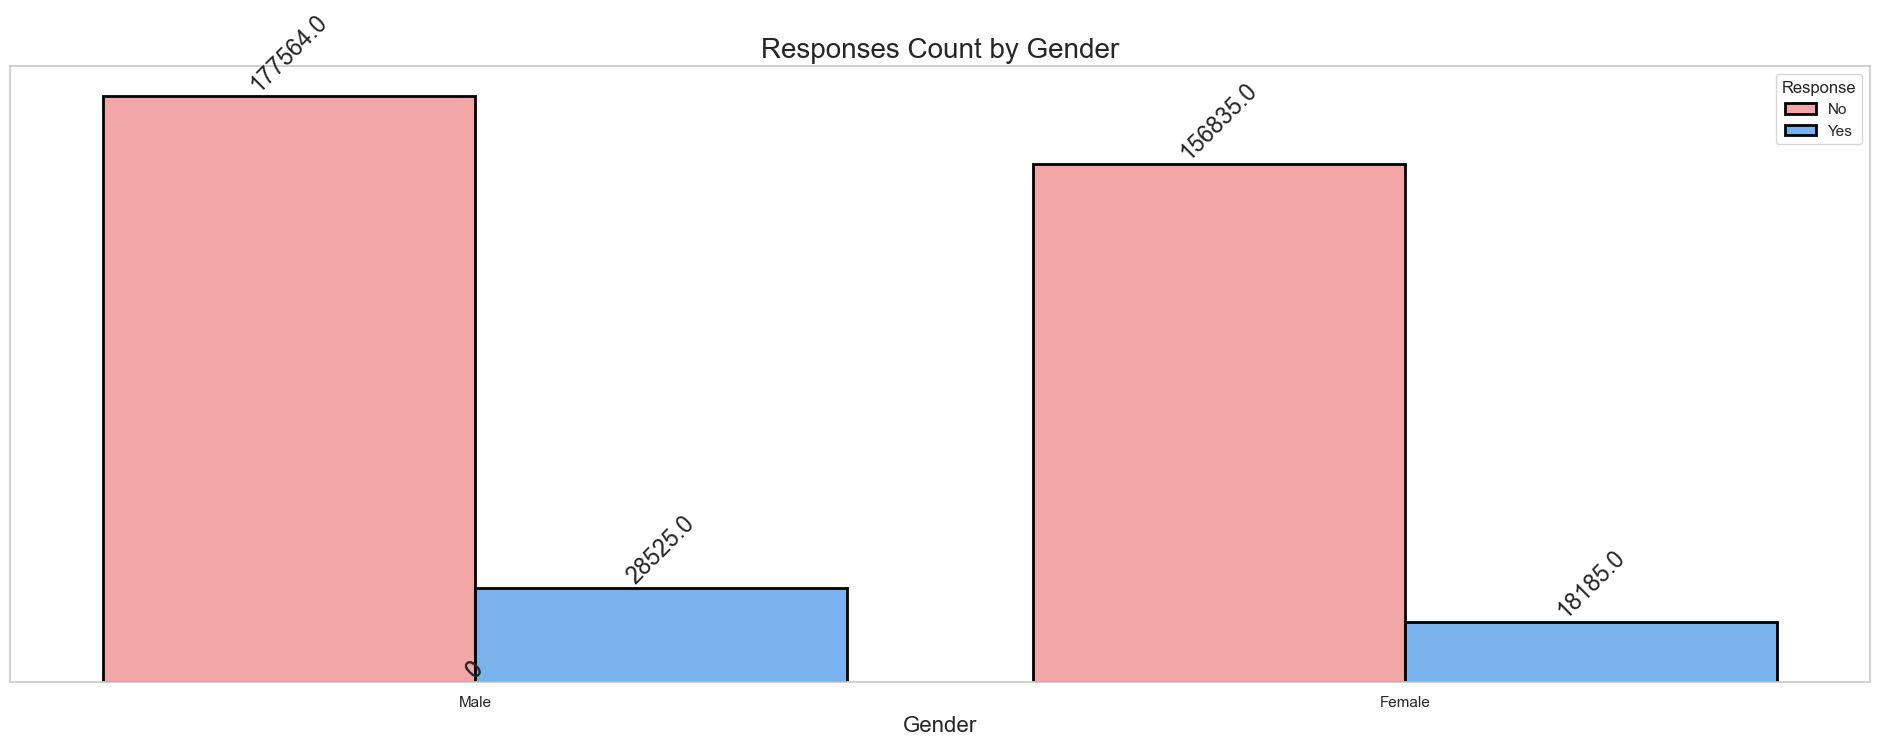

In [21]:
# Chart - 11 visualization code
sns.set_style("whitegrid")

# Define colors
palette_colors = ['#FF9999', '#66B2FF']

# Create the count plot
plt.figure(figsize=[24, 8])
ax = sns.countplot(data=df, x='Gender', hue='Response', palette=palette_colors, dodge=True, linewidth=2, edgecolor='black')

# Set title and labels
plt.title('Responses Count by Gender', fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Customize legend
plt.legend(title='Response', loc='upper right', labels=['No', 'Yes'])

# Add count values above the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=17, rotation=45)

# Remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

**Data Type: The data involves categorical variables - gender and response (Yes/No). Count plots are commonly used to visualize the distribution of categorical data.**

**Comparison: The chart allows for a clear comparison of the count of responses between different genders. The use of grouped bars with different colors makes it easy to compare the counts of "Yes" and "No" responses within each gender category.**

**Insightful: By visually representing the count of responses for each gender category, it provides insights into whether there are any gender-based differences in responses.**

**Annotations: Adding count values above each bar provides additional information, making it easier for viewers to interpret the exact count associated with each bar.**

**Legend and Labels: Clear labeling of axes and a legend are provided, enhancing the readability of the plot.**

##### 2. What is/are the insight(s) found from the chart?

**Gender Distribution: The chart shows responses from two genders: male and female.**

**Response Count: Males have 177854 ‘No’ responses and 29525 ‘Yes’ responses. Females have 158695 ‘No’ responses and 48616 ‘Yes’ responses.**

**Majority Response: For both genders, the majority of responses are ‘No’.**

**Comparison: A larger number of males responded ‘No’, while a larger number of females responded ‘Yes’.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Understanding Customer Behavior: The data shows a difference in responses between genders. This could help in understanding customer behavior and tailoring marketing strategies accordingly.**

**Product Development: If the ‘Yes’ and ‘No’ responses are related to a specific product or service, the company can use this data to improve their offerings. For example, if more females are responding ‘Yes’, it might be worth considering why and how the product or service is resonating with them.**

**Targeted Marketing: Knowing that more males responded ‘No’ and more females responded ‘Yes’, the company can adjust their marketing strategies. They could target more resources towards engaging the male audience or further capitalize on the positive response from the female audience.**

**Customer Segmentation: This data can be used for customer segmentation, allowing the company to target specific groups more effectively.****

#### Chart - 12

In [15]:
# Chart - 12 visualization code


f = df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
f

Vehicle_Age  Response   count
0    1-2 Year         0  165510
1    1-2 Year         1   34806
2    < 1 Year         0  157584
3    < 1 Year         1    7202
4   > 2 Years         0   11305
5   > 2 Years         1    4702

<Figure size 1900x500 with 0 Axes>

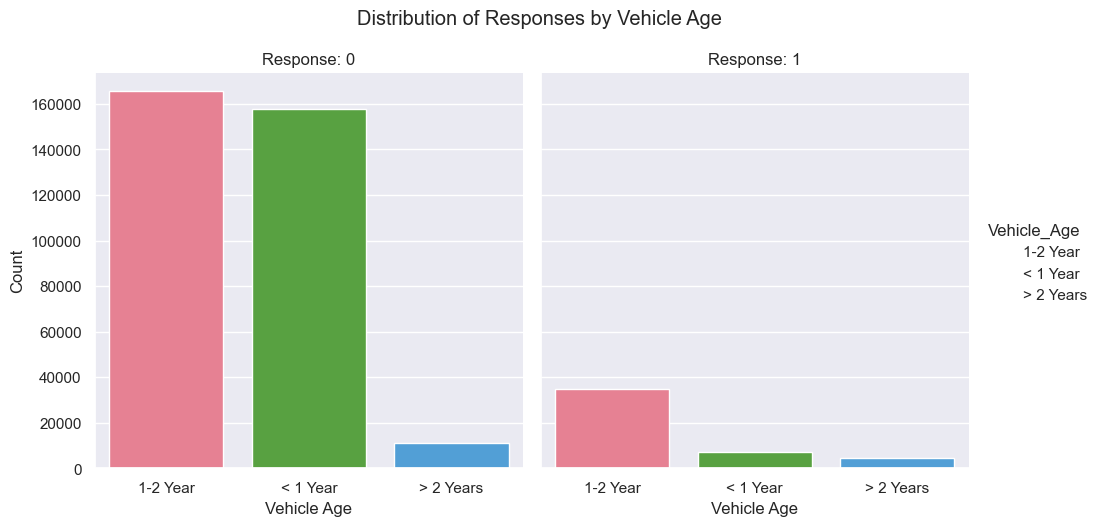

In [21]:
plt.figure(figsize=[19, 5])

# Custom color palette
custom_palette = sns.color_palette("husl", 3)

# Creating the plot
g = sns.catplot(x="Vehicle_Age", y="count", col="Response",
                data=f, kind="bar", palette=custom_palette)

# Set titles and labels
g.set_axis_labels("Vehicle Age", "Count")
g.set_titles("Response: {col_name}")
plt.suptitle("Distribution of Responses by Vehicle Age", y=1.05)

plt.show()

##### 1. Why did you pick the specific chart?

**Bar plots are easy to interpret, making them suitable for conveying the distribution of counts across categories to a wide audience.**

##### 2. What is/are the insight(s) found from the chart?

**The bar chart titled “Distribution of Responses by Vehicle Age” provides the following insights:**

**Response 0 Distribution:**

**< 1 Year: Vehicles less than a year old have the highest count.**

**1-2 Year: Vehicles aged between one and two years have the lowest count.**

**> 2 Years: Vehicles more than two years old have the second-highest count.**

**Response 1 Distribution:**

**1-2 Year: Vehicles aged between one and two years have the highest count for Response 1.**

**< 1 Year & > 2 Years: Both categories have significantly lower counts compared to the 1-2 year category.**

**This suggests that newer vehicles (less than a year old) are more likely to have Response 0, while those that are slightly** **older (1-2 years) are more likely to have Response 1. The data indicates a trend where the likelihood of Response 1 increases** **as the vehicle ages from new to 1-2 years old, then decreases for vehicles older than two years.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights gained from the chart can potentially create a positive business impact, especially if you’re in an industry related to vehicles or insurance. Here’s how:**


**Targeted Marketing: Knowing that newer vehicles are more likely to have Response 0 and vehicles aged 1-2 years are more likely to have Response 1, businesses can tailor their marketing strategies accordingly. For example, they can target owners of newer vehicles with offers that are more likely to elicit Response 0, and owners of 1-2 year old vehicles with offers that are more likely to elicit Response 1.**

**Product Development: These insights can also inform product development. If a business knows that a certain age group of vehicles is more likely to elicit a particular response, they can develop products or services that cater specifically to that age group.**

**Customer Retention: Understanding the behavior of vehicle owners based on the age of their vehicles can help businesses develop customer retention strategies. For example, they might offer special deals or incentives to owners of 1-2 year old vehicles who are more likely to have Response 1, in order to encourage them to continue using their services.**

#### Chart - 13

In [23]:
# Chart - 13 visualization code

f=df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
f

Vehicle_Damage  Response   count
0             No         0  187714
1             No         1     982
2            Yes         0  146685
3            Yes         1   45728

<Figure size 1900x500 with 0 Axes>

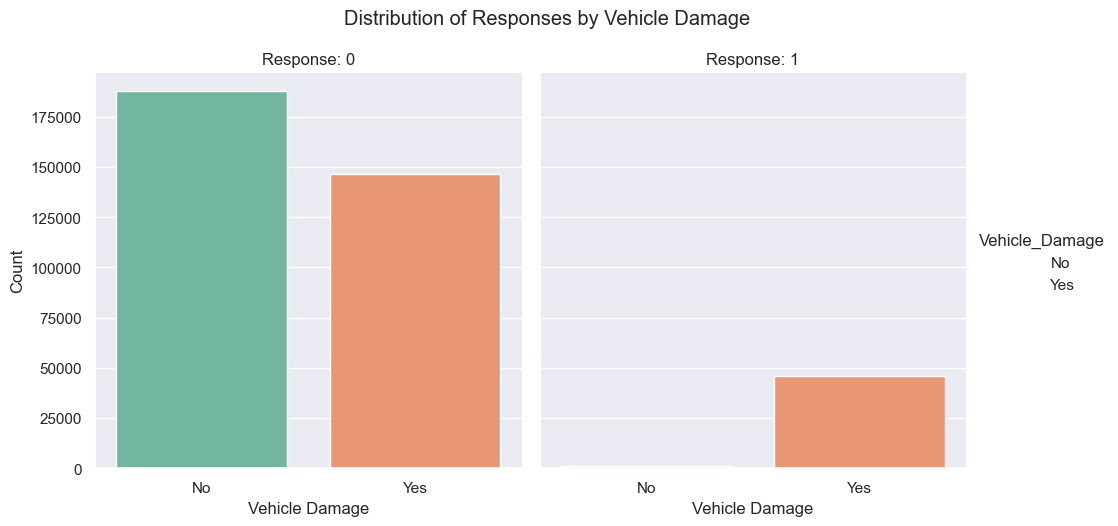

In [26]:
plt.figure(figsize=[19, 5])
custom_palette = sns.color_palette("Set2")

# Create the catplot
g = sns.catplot(x="Vehicle_Damage", y="count", col="Response",
                data=f, kind="bar", palette=custom_palette)

# Set titles and labels
g.set_axis_labels("Vehicle Damage", "Count")
g.set_titles("Response: {col_name}")
plt.suptitle("Distribution of Responses by Vehicle Damage", y=1.05)

plt.show()

##### 1. Why did you pick the specific chart?

**Bar plots are easy to interpret, making them suitable for conveying the distribution of counts across categories to a wide audience.**

##### 2. What is/are the insight(s) found from the chart?

**The bar chart titled “Distribution of Responses by Vehicle Damage” reveals the following insights:**


**Response 0 (No Vehicle Damage): A significantly higher number of respondents reported no vehicle damage, with over 175,000 counts for ‘No’ compared to around 125,000 for ‘Yes’.**

**Response 1 (Vehicle Damage): Among those who reported vehicle damage, fewer respondents answered ‘Yes’ to the associated survey question, with the count for ‘No’ being around 50,000 and ‘Yes’ even lower.**

**This data suggests that a larger proportion of the surveyed population does not report vehicle damage, and even among those with damage, a smaller number affirmatively respond to the survey question linked with Response 1. This could imply a tendency towards underreporting of vehicle damage or a reluctance to acknowledge it in surveys.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights from the chart can potentially create a positive business impact, particularly for businesses in the automotive or insurance industries. Here’s how:**

**Risk Assessment: Insurance companies, for example, could use this data to better understand the risk associated with insuring drivers who have had vehicle damage. This could help them set more accurate premiums and reduce losses.**

**Targeted Marketing: If a business knows that a customer has had vehicle damage (Response 1), they might be more likely to be interested in certain products or services. For example, a car repair shop might target customers who have had vehicle damage with special offers or discounts.**

**Product Development: These insights could inform the development of new products or services. For example, a car manufacturer might develop new safety features aimed at preventing vehicle damage, knowing that a significant number of people report having had vehicle damage.**

**Customer Retention: If a business knows that a customer has had vehicle damage, they might offer special services or incentives to retain those customers. For example, an insurance company might offer a discount on premiums to customers who have had vehicle damage but have made efforts to repair it or improve their driving habits.**

#### Chart - 14 - Correlation Heatmap

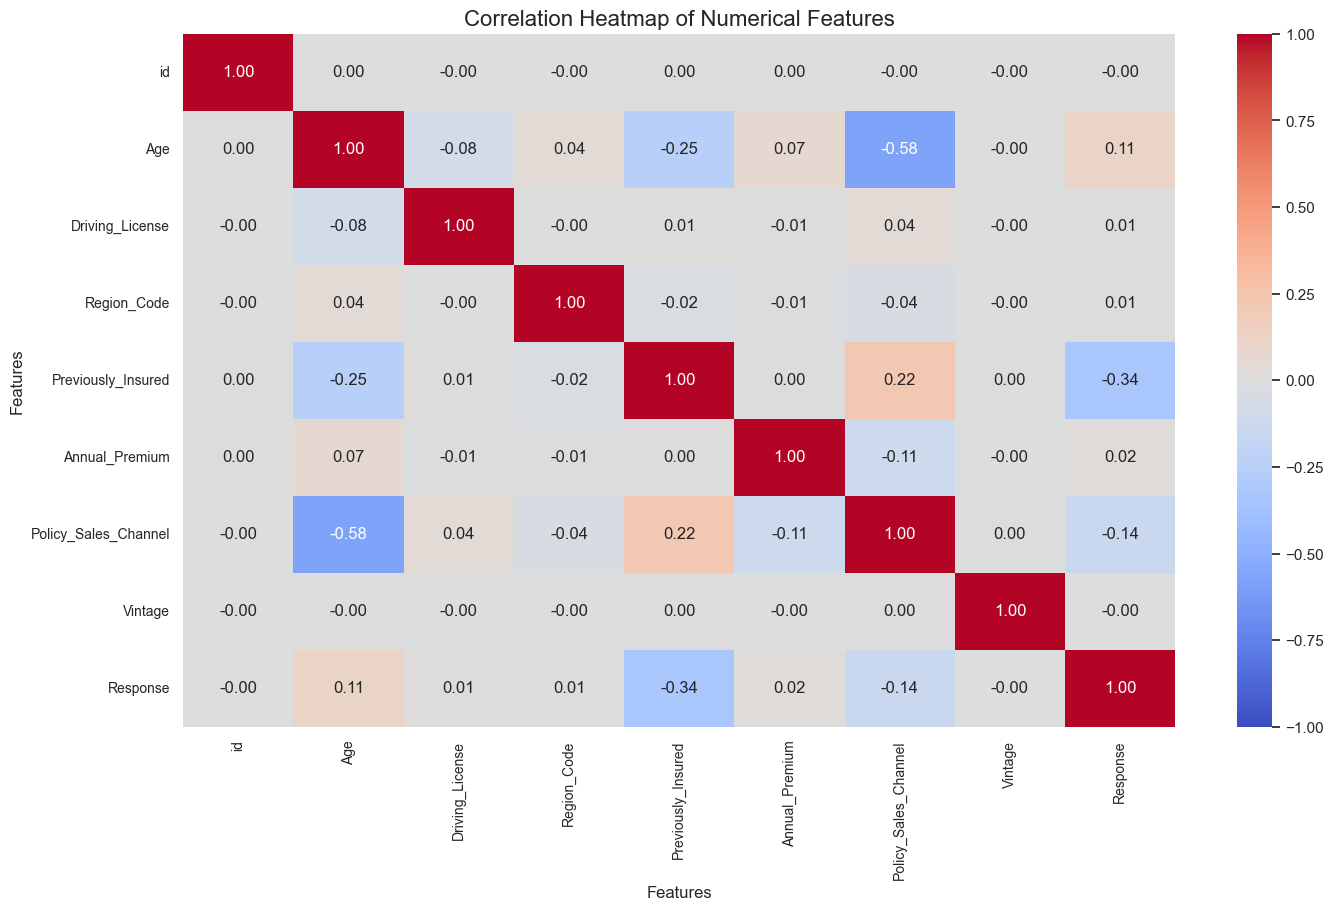

In [35]:
# Correlation Heatmap visualization code

plt.figure(figsize=[16, 9])

# Calculate correlations for numerical features
numerical_corr = df.select_dtypes(exclude=object).corr()

# Customize the color palette
color_palette = sns.color_palette("coolwarm", as_cmap=True)

# Create the heatmap with annotations
sns.heatmap(numerical_corr, annot=True, fmt=".2f", cmap=color_palette, vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Adjust font size of annotations for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**The heatmap is a suitable and effective choice for presenting correlations between numerical features to stakeholders.**

##### 2. What is/are the insight(s) found from the chart?

**The correlation heatmap you’ve provided offers several insights into the relationships between different numerical features:**


**Positive Correlation: There is a positive correlation of 0.34 between “Previously Insured” and “Response,” suggesting that those who were previously insured are more likely to have a certain response.**

**Negative Correlation: A notable negative correlation of -0.58 between “Age” and “Previously Insured” indicates that as age increases, the likelihood of being previously insured decreases.**

**These insights can be valuable for businesses in understanding customer behavior and tailoring their services accordingly. For instance, an insurance company could use this information to identify potential customers who are more likely to purchase insurance based on their age and previous insurance history.**

#### Chart - 15 - Pair Plot 

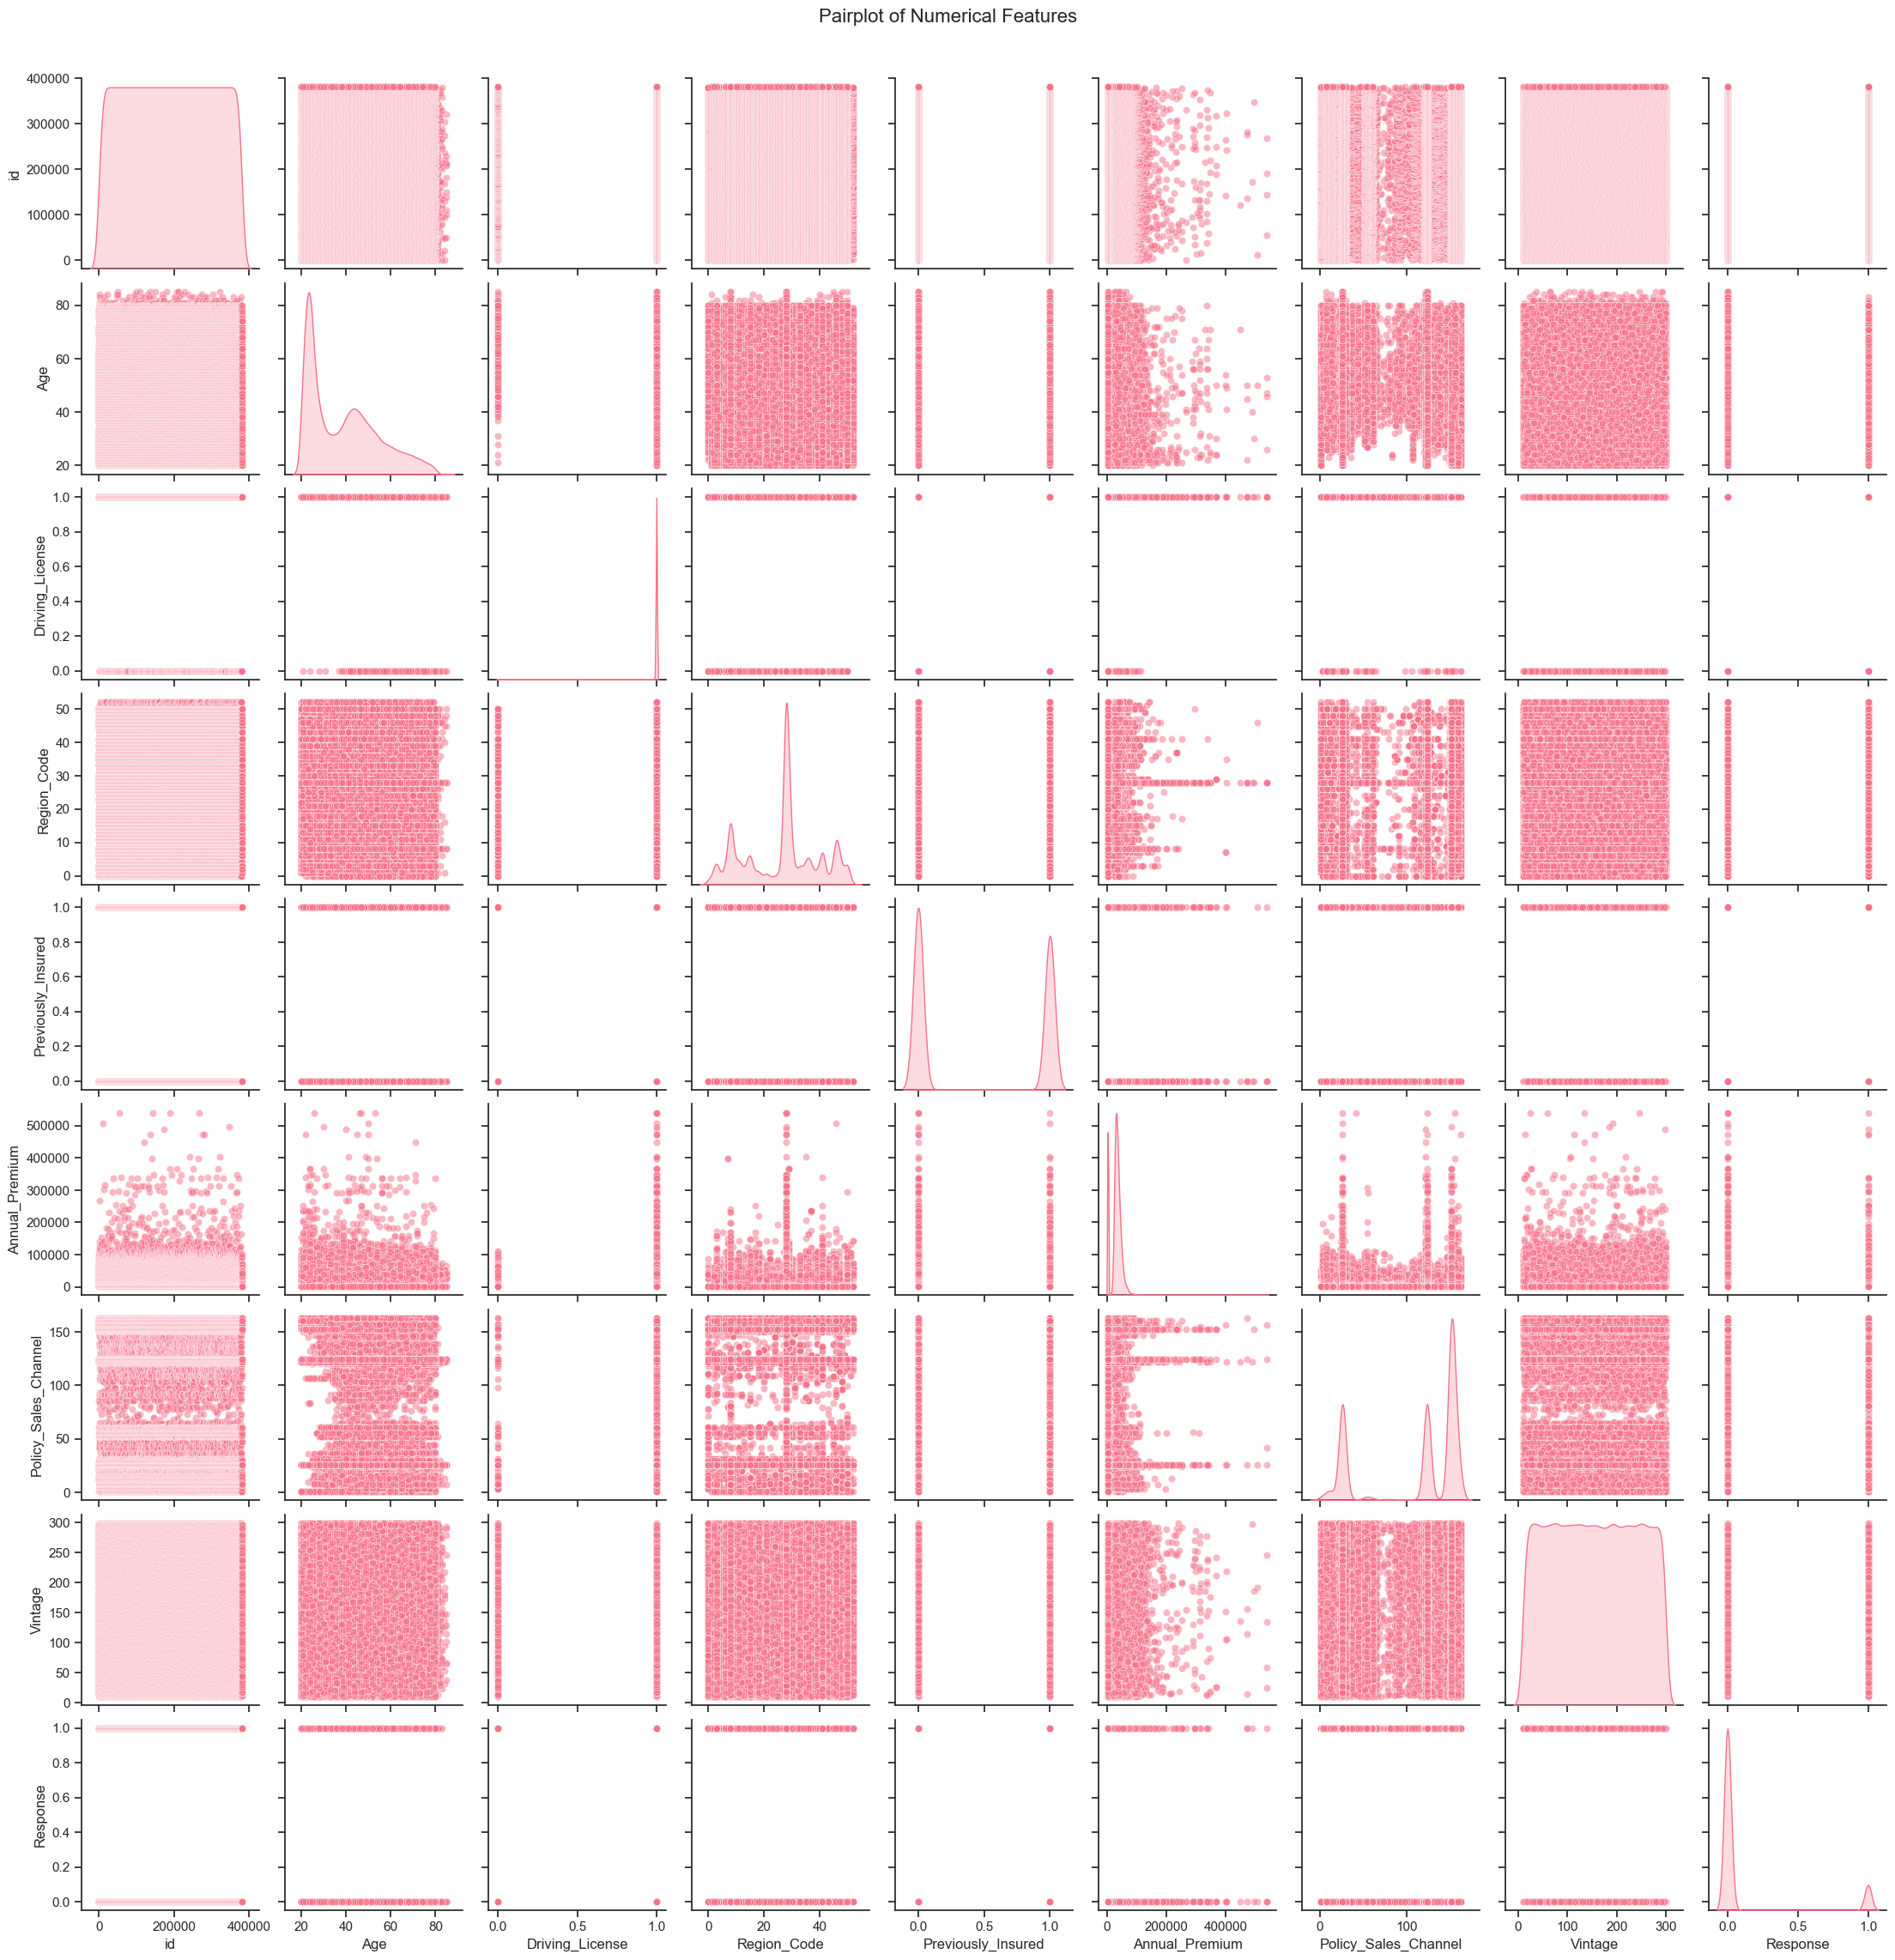

In [38]:
# Pair Plot visualization code
sns.set(style="ticks", palette="husl")

# Create pairplot
pairplot = sns.pairplot(df, diag_kind="kde", markers="o", plot_kws={"alpha": 0.5})

# Set title
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)

# Adjust ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

##### 1. Why did you pick the specific chart?

**The pairplot is a suitable and effective choice for presenting relationships between pairs of variables to stakeholders. It offers a comprehensive view of the data while being customizable and informative.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***